In [2]:
import pandas as pd
# import deepl
import numpy as np 
import re
# from transformers import pipeline
import os
# from dotenv import load_dotenv
# load_dotenv() 

# declear API keys
DEEPL_API_KEY = os.getenv("DEEPL_API_KEY")
AIRTABLE_API_KEY = os.getenv("AIRTABLE_API_KEY")
AIRTABLE_BASE_ID_UKR = os.getenv("AIRTABLE_BASE_ID_UKR")





# TODO proper text cleaning 
# TODO cost calculation for whole df 
# TODO does lambda save results if limit hit
# TODO filter for websites, adresses, 
# TODO how can NLP be used within Government Crisis, think of RQ ?


# Exploratory Analysis

In [3]:
df = pd.read_csv('../data/telegram/switzerland/df.csv')
df['messageText'] = df['messageText'].str.replace(u'\n', ' ')
print(df.shape)
# df.replace('...', np.nan, inplace=True) 
df.dropna(subset=['messageSender', 'messageText'],inplace=True) #what does it mean if messageSender empty
df.messageSender = df.messageSender.astype(int)
print(df.shape)
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)
df.drop_duplicates(subset=['messageText', 'messageSender', 'messageDatetime'], keep='first',inplace=True)
print(df.shape)
df["messageText"] = df['messageText'].str.split().str.join(' ')

# dfZ = pd.concat([df[df.chat.isin(['https://t.me/zh_helps_ukraine', 'https://t.me/zh_helps_UArefugee', 'https://t.me/zurich_hb_help', 'https://t.me/zh_housing', 'https://t.me/Zurich_UA', 'https://t.me/zh_helps_UArefugees'
#                  'https://t.me/Zh_helps_UA_mums', 'https://t.me/zh_back_ukraine', 'https://t.me/zh_helps_logistics'])], df.loc[df['messageText'].str.contains("–¶—é—Ä–∏—Ö|Zurich|Z√ºrich", case=False)]])
# dfZ.drop_duplicates(keep='first',inplace=True)
# # df = df[df.chat=="https://t.me/refugeesinSwitzerland"]
# # dfZ = dfZ[dfZ.chat=="https://t.me/refugeesinSwitzerland"]
# df['messageText'].to_csv("../data/BERTopicInput.csv", header=False, index=None)
# df[(df['messageText'].str.len() > 50) & (df['messageText'].str.len() < 50)].to_csv("../data/BERTopic100CharMin2500.csv",  index=None)
# df[(df['messageText'].str.len() >= 250) & (df['messageText'].str.len() <= 2500)]['messageText'].to_csv("../data/BERTopicInput250CharMin2500CharMax.csv",  header=False, index=None)

(388191, 9)
(335798, 9)
(335798, 9)
(335671, 9)


In [9]:
df.loc[df['messageText'].str.contains("–ü—Ä–∏–π–º–∞—é—á—ñ —Å—ñ–º'—ó|–ü—Ä–∏–π–º–∞—é—á—ñ —Ä–æ–¥–∏–Ω–∏|–ü—Ä–∏–π–º–∞—é—á–∞ —Å—ñ–º'—è|–ü—Ä–∏–Ω–∏–º–∞—é—â–∏–µ —Å–µ–º—å–∏|–°–µ–º—å–∏ –ø—Ä–∏–Ω–∏–º–∞—é—â–∏—Ö –≥–æ—Å—Ç–µ–π|Gastfamilien|Gastfamilie|host family", case=False)][["chat", 'messageID', 'messageReplyID','messageDatetime', 'messageViews', 'messageForwards','messageReactions', 'messageText']].to_csv("../raphaelGastFamilien.csv")

In [7]:
df.columns

Index(['chat', 'messageSender', 'messageID', 'messageReplyID',
       'messageDatetime', 'messageViews', 'messageForwards',
       'messageReactions', 'messageText'],
      dtype='object')

In [51]:
df[df.index==166941].messageText.values[0]

'–°–ò–°–¢–ï–ú–ê –û–ë–©–ï–°–¢–í–ï–ù–ù–û–ì–û –¢–†–ê–ù–°–ü–û–†–¢–ê –í –ö–ê–ù–¢–û–ù–ï –¶–Æ–†–ò–• (ZVV) –ß–∞—Å—Ç—å 1‚úèÔ∏è–° 1 –∏—é–Ω—è 2022 –≥–æ–¥–∞ –æ—Ç–º–µ–Ω—è–µ—Ç—Å—è –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π –ø—Ä–æ–µ–∑–¥ –≤ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–µ –¥–ª—è –ª–∏—Ü —Å–æ —Å—Ç–∞—Ç—É—Å–æ–º –∑–∞—â–∏—Ç—ã ¬´S¬ª.‚úèÔ∏è –†–∞–Ω–µ–µ –º—ã —É–∂–µ –ø–∏—Å–∞–ª–∏ –æ —Ç–æ–º, –∫–∞–∫ –º–æ–∂–Ω–æ —Å—ç–∫–æ–Ω–æ–º–∏—Ç—å –Ω–∞ –ø—Ä–æ–µ–∑–¥–µ –≤ –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–º —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–µ üöå –ø—Ä–∏ –ø–æ–º–æ—â–∏ HalbTax, Tageskarte –∏ —Ç.–¥. ‚úèÔ∏è–¢–µ–ø–µ—Ä—å –º—ã —Ö–æ—Ç–∏–º —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å –í–∞–º –∫–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–∏—Å—Ç–µ–º–æ–π –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∞ Z√ºrcher Verkehrsverbund (ZVV) –≤ –∫–∞–Ω—Ç–æ–Ω–µ –¶—é—Ä–∏—Ö.‚úèÔ∏è –í—Å—è —Å–µ—Ç—å ZVV –ø–æ–¥–µ–ª–µ–Ω–∞ –Ω–∞ —Ç–∞—Ä–∏—Ñ–Ω—ã–µ –∑–æ–Ω—ã. –ü—Ä–∏ —ç—Ç–æ–º –∑–æ–Ω—ã 110 –¶—é—Ä–∏—Ö (Z√ºrich) –∏ 120 –í–∏–Ω—Ç–µ—Ä—Ç—É—Ä (Winterthur) —Å—á–∏—Ç–∞—é—Ç—Å—è –∑–∞ 2 –∑–æ–Ω—ã –∫–∞–∂–¥–∞—è, —Ç–∞–∫ –∫–∞–∫ —Å–µ—Ç—å –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ

In [11]:
df[df['messageText'].str.len() > 50]

chat  messageSender  \
0       https://t.me/refugeesinSwitzerland     1783309641   
1       https://t.me/refugeesinSwitzerland     1335905103   
2       https://t.me/refugeesinSwitzerland      264593736   
3       https://t.me/refugeesinSwitzerland      264593736   
4       https://t.me/refugeesinSwitzerland      400069603   
...                                    ...            ...   
365993        https://t.me/StGallenUkraine      799107007   
365995        https://t.me/StGallenUkraine     1820952899   
366002        https://t.me/StGallenUkraine      799107007   
366006        https://t.me/StGallenUkraine     1032103810   
366013        https://t.me/StGallenUkraine     2119276973   

                  messageDatetime  \
0       2022-09-16 13:58:53+00:00   
1       2022-09-16 13:56:17+00:00   
2       2022-09-16 13:43:19+00:00   
3       2022-09-16 13:42:19+00:00   
4       2022-09-16 13:41:39+00:00   
...                           ...   
365993  2022-03-19 20:40:40+00:00   
365995  2022-03-19 20:14:30+00:00   
366002  2022-03-19 09:44:59+00:00   
366006  2022-03-19 09:34:48+00:00   
366013  2022-03-19 06:11:29+00:00   

                                              messageText  
0       –Ø —Ç—É—Ç 15 –ª–µ—Ç, –ø–æ—ç—Ç–æ–º—É –∏ —É–¥–∏–≤–ª—è—é—Å—å –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—é –∫...  
1       –°–ø—Ä–∞—à–∏–≤–∞–π—Ç–µ —É SEM –ø–æ –≤–∞—à–µ–º—É —Å–ª—É—á–∞—é. –í—Å–µ –∏–Ω–¥–∏–≤–∏...  
2       –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ –Ω–µ—Ç, –µ—Å–ª–∏ —É –≤–∞—Å –Ω–µ—Ç –≤–µ—Å–∫–∏—Ö –ø—Ä–∏—á...  
3       –í—ã –Ω–µ –º–æ–∂–µ—Ç–µ —Å–≤–æ–±–æ–¥–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å –º–µ—Å—Ç–æ –∂–∏—Ç–µ–ª—å—Å—Ç–≤...  
4       üôèüèª–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –°–∫–∞–∂–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–∏–º–µ—Ç –ª–∏ ...  
...                                                   ...  
365993  –∑–∞—â–∏—Ç–∞ –∏ —É–±–µ–∂–∏—â–µ–û–±–Ω–æ–≤–ª–µ–Ω–æ: 16.03.2022 10:00–§–µ–¥...  
365995  –î–æ–±—Ä–æ–≥–æ –≤–µ—á–æ—Ä–∞. –ü—ñ–¥—Å–∫–∞–∂—ñ—Ç—å –±—É–¥—å –ª–∞—Å–∫–∞ –≤ –°–∞–Ω–∫—Ç-...  
366002  –ï—Å–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –≤–æ–ø—Ä–æ—Å—ã, –æ–±—Ä–∞—â–∞–π—Ç–µ—Å—å. –ß–µ–º —Å–º–æ–≥—É ...  
366006  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ) –∏ –º—ã –≤ –†–æ—Ä—à–∞—Ö) —è —Å —Å—ã–Ω–æ–º 9 –ª–µ—Ç –∏...  
366013  3 –º–µ—Å—è—Ü–∞ –±–µ—Å–ø–ª–∞—Ç–Ω—ã—Ö —è–∑—ã–∫–æ–≤—ã—Ö –∫—É—Ä—Å–æ–≤ –¥–ª—è —É–∫—Ä–∞–∏–Ω...  

[208298 rows x 4 columns]

In [3]:
df.loc[df['messageText'].str.contains("Staatskanzlei", case=False)].messageText.to_csv("../data/results/sentenceStaatskanzlei.csv")

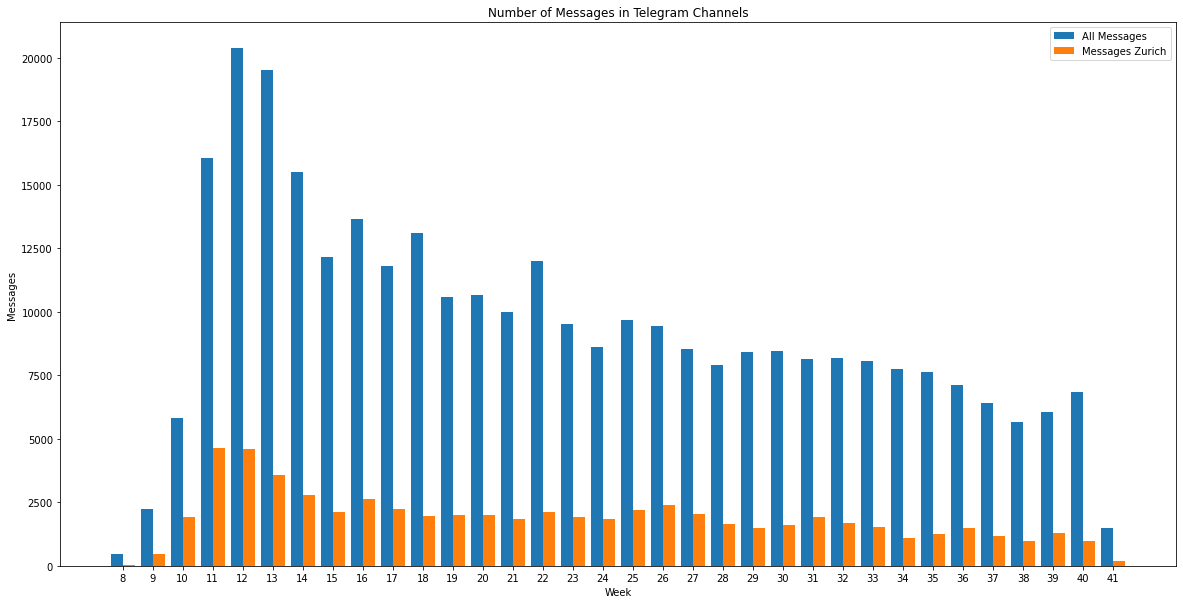

In [20]:
import matplotlib.pyplot as plt 

dfWeek = pd.DataFrame(df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts()).merge(dfZ['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts(), left_index=True, right_index=True).sort_index()

X = dfWeek.index
nrMessagesPerWeekAll = dfWeek.messageDatetime_x
nrMessagesPerWeekZurich = dfWeek.messageDatetime_y
  
X_axis = np.arange(len(X))
plt.figure(figsize=(20,10))
plt.bar(X_axis - 0.2, nrMessagesPerWeekAll, 0.4, label = 'All Messages')
plt.bar(X_axis + 0.2, nrMessagesPerWeekZurich, 0.4, label = 'Messages Zurich')
  
plt.xticks(X_axis, X)
plt.xlabel("Week")
plt.ylabel("Messages")
plt.title("Number of Messages in Telegram Channels")
plt.legend()
plt.savefig('../plots/allTelegramGroups.jpg')
# plt.show()

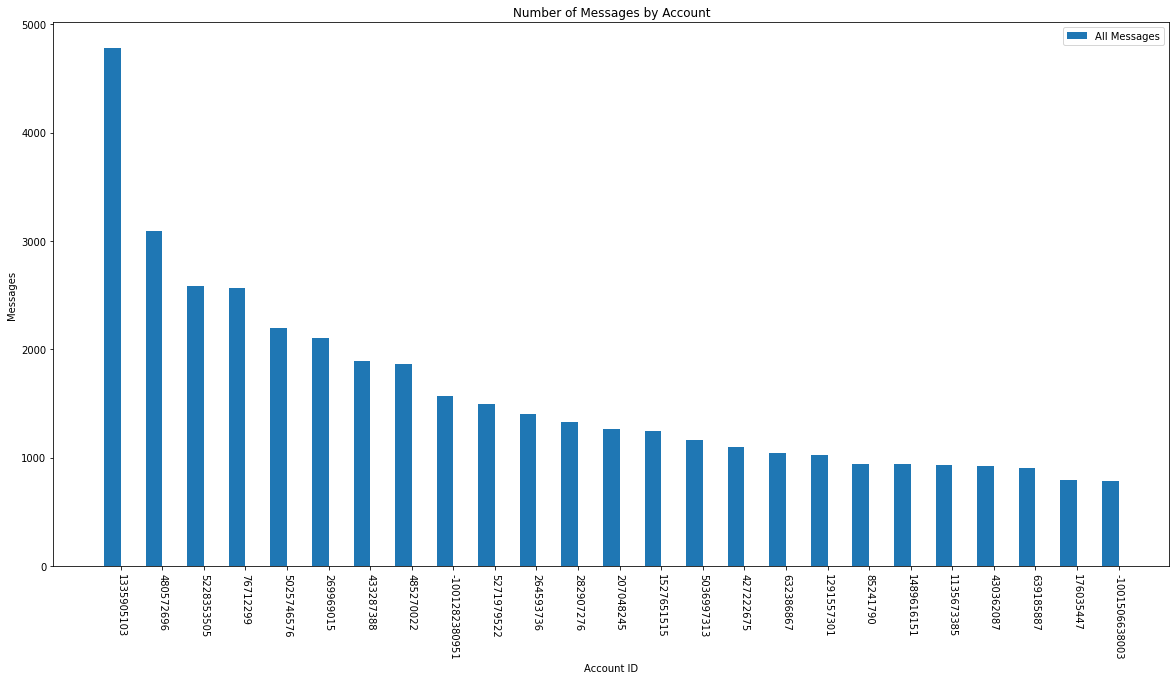

In [20]:
# dfWeek = pd.DataFrame(df['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts()).merge(dfZ['messageDatetime'].apply(lambda x: pd.to_datetime(x).isocalendar()[1]).value_counts(), left_index=True, right_index=True).sort_index()

X = df.messageSender.value_counts()[:25].index
nrMessagesPerWeekAll = df.messageSender.value_counts()[:25]
# nrMessagesPerWeekZurich = dfWeek.messageDatetime_y
  
X_axis = np.arange(len(X))

plt.figure(figsize=(20,10))
plt.bar(X_axis - 0.2, nrMessagesPerWeekAll, 0.4, label = 'All Messages')
# plt.bar(X_axis + 0.2, nrMessagesPerWeekZurich, 0.4, label = 'Messages Zurich')
  
plt.xticks(X_axis, X, rotation=-90)
plt.xlabel("Account ID")
plt.ylabel("Messages")
plt.title("Number of Messages by Account")
plt.legend()
plt.savefig('../plots/allTelegramGroupsMostMessagesBySingleAccountTop25.jpg')

In [43]:
df.loc[df['messageText'].str.contains("Staatskanzlei", case=False)

SyntaxError: unexpected EOF while parsing (2395417252.py, line 1)

In [28]:
df[df.messageSender==1335905103].messageText

1         –°–ø—Ä–∞—à–∏–≤–∞–π—Ç–µ —É SEM –ø–æ –≤–∞—à–µ–º—É —Å–ª—É—á–∞—é. –í—Å–µ –∏–Ω–¥–∏–≤–∏...
12        ‚òùüèª–í—Å–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ–º —Ç–æ–≤–∞—Ä–æ–≤/—É—Å–ª...
16        –£–∂–µ –º–Ω–æ–≥–æ —Ä–∞–∑ —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞–ª–∞ –∏ —Å–Ω–æ–≤–∞ –ø–æ–≤—Ç–æ—Ä—é—Å—å:–°...
21        –ò –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –≤—ã –º–µ—Å—Ç–Ω—ã—Ö —Å–æ—Å–µ–¥–µ–π –ø–æ–¥–∫–ª—é—á–∏—Ç–µ?...
23        –ü–æ —Ñ–∞–∫—Ç—É —Ç–∞–∫–∏—Ö –∑–∞–∫–æ–Ω–æ–≤ –Ω–µ—Ç. –ï—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, —á...
                                ...                        
240243    –ò–∑ –ª–∏—á–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π. –¢—É—Ç –¥–æ—Ä–æ–≥–æ, —Å—Ç—Ä–æ–≥–æ –∏ –æ—Å—Ç...
240248    –ü–æ—Å–æ–±–∏—è –¥–ª—è –£–∫—Ä–∞–∏–Ω—Ü–µ–≤ –≤ –®–≤–µ–π—Ü–∞—Ä–∏–∏ –ë—É–¥—É—Ç –ª–∏ –≤—ã–ø...
240386    –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≤–∞–º –±—ã –≤ –õ—É–≥–∞–Ω–æ, –Ω–∞–ø—Ä–∏–º–µ—Äüòç —Å –∏—Ç–∞...
240414    –¢—É—Ç –¥–∞–∂–µ –Ω–µ –≤ –≤–æ—Ä–æ–≤–∞—Ç—å –¥–µ–ª–æ. –ü—Ä–æ—Å—Ç–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä,...
240650    –ú–Ω–µ —Å–∫–∞–∑–∞–ª–∏, —á—Ç–æ —Å–æ–±–∞–∫—É —

In [35]:
df[df.messageSender==1335905103].messageText[240248]

'–ü–æ—Å–æ–±–∏—è –¥–ª—è –£–∫—Ä–∞–∏–Ω—Ü–µ–≤ –≤ –®–≤–µ–π—Ü–∞—Ä–∏–∏ –ë—É–¥—É—Ç –ª–∏ –≤—ã–ø–ª–∞—á–∏–≤–∞—Ç—å –ø–æ—Å–æ–±–∏–µ? - –î–∞. –°–µ–π—á–∞—Å –µ—â—ë –Ω–µ –≤—Å–µ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ —Å—Ç–∞—Ç—É—Å S –µ–≥–æ –ø–æ–ª—É—á–∞—é—Ç, —Ç–∞–∫ –∫–∞–∫ –º–∏–≥—Ä–∞—Ü–∏–æ–Ω–Ω—ã–µ —Å–ª—É–∂–±—ã –®–≤–µ–π—Ü–∞—Ä–∏–∏ –ø–µ—Ä–µ–≥—Ä—É–∂–µ–Ω—ã, –∏ –ø—Ä–∏–≤–µ—Å—Ç–∏ –≤—Å—ë –≤ –ø–æ—Ä—è–¥–æ–∫ –∑–∞–π–º—ë—Ç –≤—Ä–µ–º—è. –ö–∞–∫–æ–µ –ø–æ—Å–æ–±–∏–µ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –®–≤–µ–π—Ü–∞—Ä–∏—è? –í–æ –≤—Ä–µ–º—è –ø—Ä–µ–±—ã–≤–∞–Ω–∏—è –≤ —Ü–µ–Ω—Ç—Ä–∞—Ö –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è —É–±–µ–∂–∏—â–∞: - –ª—é–¥–∏ —Å–æ —Å—Ç–∞—Ç—É—Å–æ–º S –ø–æ–ª—É—á–∞—é—Ç 3 —Ñ—Ä–∞–Ω–∫–∞ –≤ –¥–µ–Ω—å. –ü–æ–∫–∞ —ç—Ç–∏ –≤—ã–ø–ª–∞—Ç—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Å –∑–∞–¥–µ—Ä–∂–∫–∞–º–∏, —Ç–∞–∫ –∫–∞–∫ —Å–∏—Å—Ç–µ–º–∞ –µ—â—ë –ø–µ—Ä–µ—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç—Å—è. –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∞ –ª—é–¥—å–º–∏ –∏–∑ –£–∫—Ä–∞–∏–Ω—ã, –∂–∏–≤—É—â–∏–º–∏ —Å–µ–π—á–∞—Å –≤ —ç—Ç–∏—Ö —Ü–µ–Ω—Ç—Ä–∞—Ö. - –≠—Ç–∏ 3 —Ñ—Ä–∞–Ω–∫–∞ - –¥–µ–Ω—å–≥–∏ –Ω–∞ –ª–∏—á–Ω—ã–µ —Ç

In [36]:
# df.messageSender.value_counts().reset_index()[:1000].to_csv('../data/results/1000MostActiveUsers.csv', index=None, header=['sender_id', 'messages_send'] )
df.messageSender.value_counts()[:1000]

1335905103    4779
480572696     3092
5228353505    2588
76712299      2567
5025746576    2194
              ... 
260947514       51
2002863600      51
1772162435      51
744070252       51
767572491       51
Name: messageSender, Length: 1000, dtype: int64

In [37]:
df[df.messageSender==1335905103].messageText[1]

'–°–ø—Ä–∞—à–∏–≤–∞–π—Ç–µ —É SEM –ø–æ –≤–∞—à–µ–º—É —Å–ª—É—á–∞—é. –í—Å–µ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ. –û–¥–Ω–æ–π –¥–µ–≤—É—à–∫–µ –∏–∑ –ì–µ—Ä–º–∞–Ω–∏–∏ –æ—Ç–≤–µ—Ç–∏–ª–∏ —Ç–∞–∫: https://t.me/refugeesinSwitzerland/123014'

In [4]:
from collections import Counter
from urllib.parse import urlparse

baselevel=3

def retrieve_base_url(url, baselevel=0):
    if baselevel==0:
        try:
            parseresult = urlparse(url)
            url_clean = parseresult.scheme + '//' + parseresult.netloc
            return url_clean
        except:
            ValueError
    if baselevel>=1:
        try:
            parseresult = urlparse(url)
            url_clean = parseresult.scheme + '//' + parseresult.netloc + '/' + '/'.join(parseresult.path.split('/')[1:baselevel+1])
            print(url_clean)
            return url_clean
        except:
            ValueError



df['messageURL'] = df['messageText'].apply(lambda x: re.findall(r'(https?://[^\s]+)', x))
urlList = [x for xs in df['messageURL'] for x in xs]
# pd.Series(urlList).value_counts().to_csv("../data/results/mostSharedLinks.csv")
urlTelegramList = [url for url in urlList if url.startswith("https://t.me")]
pd.Series(urlTelegramList).value_counts().to_csv("../data/telegram/switzerland/mostSharedLinksTelegramGroups.csv")
urlBaseLevelList = [retrieve_base_url(url=url,baselevel=baselevel) for url in urlList]
# pd.Series(urlBaseLevelList).value_counts().to_csv(f"../data/results/mostSharedBaseLevel{baselevel}Links.csv")


https//act.campax.org/events/webinar-fur-ukraine-ieniostil-osobista-formula-shchastia](https:/
https//us02web.zoom.us/j/82962158558
https//www.kmu.gov.ua/news/radiodiktant-nacionalnoyi-yednosti-2022-yak-vzyati-uchast
https//t.me/campax_ukraine_help_switzerland](https://t.me
https//act.campax.org/events/zurich-regelmassigen-kunsttherapeutischen-treffen-rieghuliarni-zustrichi-z-art-tierapiyi-rieghuliarnyie-vstriechi-po-art-tierapii
https//us02web.zoom.us/j/85719073051
https//act.campax.org/events/adaptatsiia-bizhientsiv-i-znizhiennia-trivozhnosti-dopomogha-i-poradi-psikhologha-anpassung-von-gefluchteten-und-angstabbau](https:/
https//forms.gle/H6yf5CZcYXLLRRGk8
https//t.me/UkrainianSwitzerland
https//t.me/campax_ukraine_help_switzerland
https//us02web.zoom.us/j/85719073051
https//act.campax.org/events/adaptatsiia-bizhientsiv-i-znizhiennia-trivozhnosti-dopomogha-i-poradi-psikhologha-anpassung-von-gefluchteten-und-angstabbau](https:/
http//bit.ly/3WxVKJH)[üëâ](http://bit.ly
http//bit.ly/3

In [12]:
pd.Series(urlTelegramList).value_counts().to_csv("../data/telegram_queries/mostSharedLinksTelegramGroups.csv")

In [42]:
pd.Series(urlList).value_counts().to_csv("../data/results/value_counts_links_send.csv")

In [18]:
pd.Series(urlTelegramList).value_counts().to_csv("../data/value_counts_telegramchannels.csv")

# Bag of Words & TF-IDF

In [4]:
#define stopwords
from nltk.corpus import stopwords
stopWords = stopwords.words('english') 
for word in stopwords.words('german'):
    stopWords.append(stopwords)
for word in stopwords.words('russian'):
    stopWords.append(word)
ukrstopWords = ['–∞', '–∞–±–∏', '–∞–±–∏–¥–µ', '–∞–±–∏–∫–∏–º', '–∞–±–∏–∫–æ–≥–æ', '–∞–±–∏–∫–æ–ª–∏', '–∞–±–∏–∫–æ–º—É', '–∞–±–∏–∫—É–¥–∏', '–∞–±–∏—Ö—Ç–æ', '–∞–±–∏—á–∏–π', '–∞–±–∏—á–∏–π–æ–≥–æ', '–∞–±–∏—á–∏–π–æ–º—É', '–∞–±–∏—á–∏–º', '–∞–±–∏—á–∏—é', '–∞–±–∏—á–∏—è', '–∞–±–∏—á–∏—î', '–∞–±–∏—á–∏—î–º—É', '–∞–±–∏—á–∏—î—é', '–∞–±–∏—á–∏—î—ó', '–∞–±–∏—á–∏—ó', '–∞–±–∏—á–∏—ó–π', '–∞–±–∏—á–∏—ó–º', '–∞–±–∏—á–∏—ó–º–∏', '–∞–±–∏—á–∏—ó—Ö', '–∞–±–∏—á–æ–≥–æ', '–∞–±–∏—á–æ–º—É', '–∞–±–∏—â–æ', '–∞–±–∏—è–∫–∞', '–∞–±–∏—è–∫–µ', '–∞–±–∏—è–∫–∏–π', '–∞–±–∏—è–∫–∏–º', '–∞–±–∏—è–∫–∏–º–∏', '–∞–±–∏—è–∫–∏—Ö', '–∞–±–∏—è–∫–æ–≥–æ', '–∞–±–∏—è–∫–æ–º—É', '–∞–±–∏—è–∫–æ—é', '–∞–±–∏—è–∫–æ—ó', '–∞–±–∏—è–∫—É', '–∞–±–∏—è–∫—ñ', '–∞–±–∏—è–∫—ñ–π', '–∞–±–∏—è–∫—ñ–º', '–∞–±–æ', '–∞–±–æ—â–æ', '–∞–≤–∂–µ–∂', '–∞–≤–æ—Å—å', '–∞–≥–∞', '–∞–¥', '–∞–¥–∂–µ', '–∞–∂', '–∞–∂–µ–Ω—å', '–∞–∑', '–∞–π', '–∞–ª–µ', '–∞–ª–æ', '–∞–º—ñ–Ω—å', '–∞–Ω—Ç', '–∞–Ω—É', '–∞–Ω—ñ', '–∞–Ω—ñ–¥–µ', '–∞–Ω—ñ–∂', '–∞–Ω—ñ–∑–∞—â–æ', '–∞–Ω—ñ–∫–∏–º', '–∞–Ω—ñ–∫–æ–≥–æ', '–∞–Ω—ñ–∫–æ–≥—ñ—Å—ñ–Ω—å–∫–æ', '–∞–Ω—ñ–∫–æ–ª–∏', '–∞–Ω—ñ–∫–æ–º—É', '–∞–Ω—ñ—Å–∫—ñ–ª—å–∫–∏', '–∞–Ω—ñ—Ö—Ç–æ', '–∞–Ω—ñ—á–∏–º', '–∞–Ω—ñ—á–æ–≥–æ', '–∞–Ω—ñ—á–æ–≥—ñ—Å—ñ–Ω—å–∫–æ', '–∞–Ω—ñ—á–æ–º—É', '–∞–Ω—ñ—â–æ', '–∞–Ω—ñ—è–∫–∞', '–∞–Ω—ñ—è–∫–µ', '–∞–Ω—ñ—è–∫–∏–π', '–∞–Ω—ñ—è–∫–∏–º', '–∞–Ω—ñ—è–∫–∏–º–∏', '–∞–Ω—ñ—è–∫–∏—Ö', '–∞–Ω—ñ—è–∫–æ–≥–æ', '–∞–Ω—ñ—è–∫–æ–º—É', '–∞–Ω—ñ—è–∫–æ—é', '–∞–Ω—ñ—è–∫–æ—ó', '–∞–Ω—ñ—è–∫—É', '–∞–Ω—ñ—è–∫—ñ', '–∞–Ω—ñ—è–∫—ñ–π', '–∞–Ω—ñ—è–∫—ñ–º', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–∞', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–µ', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–∏–π', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–∏–º', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–∏–º–∏', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–∏—Ö', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–æ–≥–æ', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–æ–º—É', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–æ—é', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫–æ—ó', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫—É', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫—ñ', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫—ñ–π', '–∞–Ω—ñ—è–∫—ñ—Å–µ–Ω—å–∫—ñ–º', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∞', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–µ', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–π', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–º', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏—Ö', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ–º—É', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ—é', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ—ó', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—É', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ–π', '–∞–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ–º', '–∞—Ç', '–∞—Ç–æ', '–∞—Ç–æ–∂', '–∞—É', '–∞—Ö', '–∞—á', '–∞—á–µ–π', '–∞—è–∫–∂–µ', '–±', '–±–∞', '–±–∞–≥–∞—Ç–æ', '–±–∞–≥–∞—Ç—å–º–∞', '–±–∞–≥–∞—Ç—å–æ–º', '–±–∞–≥–∞—Ç—å–æ—Ö', '–±–∞–∑', '–±–∞–π', '–±–∞—Ç', '–±–∞—Ö', '–±–∞—Ü', '–±–∞—à', '–±–µ', '–±–µ–∂', '–±–µ–∑', '–±–µ–∑–ø–µ—Ä–µ—Ä–≤–Ω–æ', '–±–µ–ª', '–±–µ—Ä', '–±–∏', '–±–∏—Ä', '–±–∏—á', '–±–ª–∏–∑—å–∫–æ', '–±–ª–∏–∑—å–∫–æ –≤—ñ–¥', '–±–æ', '–±–æ–≤', '–±–æ–¥', '–±–æ–¥–∞–π', '–±–æ–∑', '–±–æ—à', '–±—É–≤', '–±—É–≤–∞—î', '–±—É–¥–µ', '–±—É–¥–µ–º', '–±—É–¥–µ–º–æ', '–±—É–¥–µ—Ç–µ', '–±—É–¥–µ—à', '–±—É–¥—É', '–±—É–¥—É—Ç—å', '–±—É–¥—å', '–±—É–¥—å –ª–∞—Å–∫–∞', '–±—É–¥—å–º–æ', '–±—É–¥—å—Ç–µ', '–±—É–ª–∞', '–±—É–ª–∏', '–±—É–ª–æ', '–±—É—Ç–∏', '–±—É—Ö', '–±—É—Ü', '–±—É—Ü—ñ–º', '–±—É—Ü—ñ–º—Ç–æ', '–±—ñ', '–±—ñ–±', '–±—ñ–ª—å—à', '–±—ñ–ª—å—à–µ', '–±—ñ–ª—è', '–≤', '–≤ –±—ñ–∫', '–≤ –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –≤—ñ–¥', '–≤ –º—ñ—Ä—É', '–≤ –Ω–∞–ø—Ä—è–º—ñ –¥–æ', '–≤ –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑', '–≤ –ø—Ä–æ—Ü–µ—Å—ñ', '–≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ', '–≤ —Ä–æ–ª—ñ', '–≤ —Å–∏–ª—É', '–≤ —Å—Ç–æ—Ä–æ–Ω—É', '–≤ —Å—É–ø—Ä–æ–≤–æ–¥—ñ', '–≤ —Ö–æ–¥—ñ', "–≤ —ñ–º'—è", '–≤ —ñ–Ω—Ç–µ—Ä–µ—Å–∞—Ö', '–≤–∞–¥', '–≤–∞–∂–ª–∏–≤–∞', '–≤–∞–∂–ª–∏–≤–µ', '–≤–∞–∂–ª–∏–≤–∏–π', '–≤–∞–∂–ª–∏–≤—ñ', '–≤–∞–∫', '–≤–∞–º', '–≤–∞–º–∏', '–≤–∞–Ω', '–≤–∞—Å', '–≤–∞—Ç', '–≤–∞—à', '–≤–∞—à–∞', '–≤–∞—à–µ', '–≤–∞—à–∏–º', '–≤–∞—à–∏–º–∏', '–≤–∞—à–∏—Ö', '–≤–∞—à–æ–≥–æ', '–≤–∞—à–æ–º—É', '–≤–∞—à–æ—é', '–≤–∞—à–æ—ó', '–≤–∞—à—É', '–≤–∞—à—ñ', '–≤–∞—à—ñ–π', '–≤–∞—à—ñ–º', '–≤–≤–µ—Å—å', '–≤–≤—ñ', '–≤–≥–æ—Ä—É', '–≤–¥–∞–ª–∏–Ω—ñ', '–≤–µ–¥', '–≤–µ—Ä—Ö', '–≤–µ—Å—å', '–≤–µ—Ö', '–≤–∂–µ', '–≤–∑–¥–æ–≤–∂', '–≤–∏', '–≤–∏–∑', '–≤–∏—Å', '–≤–∏—Å–æ—á–∏–Ω—ñ', '–≤–∏—â–µ ', '–≤–π–æ', '–≤–ª–∞—Å–Ω–µ', '–≤–ª–∞—Å—Ç–∏–≤–æ', '–≤–º—ñ—Ç–∏', '–≤–Ω–∞—Å–ª—ñ–¥–æ–∫', '–≤–Ω–∏–∑', '–≤–Ω–∏–∑—É', '–≤–æ', '–≤–æ–Ω', '–≤–æ–Ω–∞', '–≤–æ–Ω–∏', '–≤–æ–Ω–æ', '–≤–æ—Å—å–º–∏–π', '–≤–ø–µ—Ä–µ–¥', '–≤–ø–æ–¥–æ–≤–∂', '–≤–ø–æ–ø–µ—Ä–µ–∫', '–≤–ø—Ä–∏—Ç–∏—Å–∫', '–≤–ø—Ä–∏—Ç—É–ª', '–≤–ø—Ä–æ–¥–æ–≤–∂', '–≤–ø—Ä–æ—Å—Ç', '–≤—Å–µ', '–≤—Å–µ—Ä–µ–¥–∏–Ω—ñ', '–≤—Å–µ—é', '–≤—Å–ª—ñ–¥', '–≤—Å—É–ø–µ—Ä–µ—á', '–≤—Å—å–æ–≥–æ', '–≤—Å—å–æ–º—É', '–≤—Å—é', '–≤—Å—é–¥–∏', '–≤—Å—è', '–≤—Å—è–∫', '–≤—Å—è–∫–∞', '–≤—Å—è–∫–µ', '–≤—Å—è–∫–∏–π', '–≤—Å—è–∫–∏–º', '–≤—Å—è–∫–∏–º–∏', '–≤—Å—è–∫–∏—Ö', '–≤—Å—è–∫–æ–≥–æ', '–≤—Å—è–∫–æ–º—É', '–≤—Å—è–∫–æ—é', '–≤—Å—è–∫–æ—ó', '–≤—Å—è–∫—É', '–≤—Å—è–∫—ñ', '–≤—Å—è–∫—ñ–π', '–≤—Å—è–∫—ñ–º', '–≤—Å—ñ', '–≤—Å—ñ–π', '–≤—Å—ñ–ª—è–∫–∞', '–≤—Å—ñ–ª—è–∫–µ', '–≤—Å—ñ–ª—è–∫–∏–π', '–≤—Å—ñ–ª—è–∫–∏–º', '–≤—Å—ñ–ª—è–∫–∏–º–∏', '–≤—Å—ñ–ª—è–∫–∏—Ö', '–≤—Å—ñ–ª—è–∫–æ–≥–æ', '–≤—Å—ñ–ª—è–∫–æ–º—É', '–≤—Å—ñ–ª—è–∫–æ—é', '–≤—Å—ñ–ª—è–∫–æ—ó', '–≤—Å—ñ–ª—è–∫—É', '–≤—Å—ñ–ª—è–∫—ñ', '–≤—Å—ñ–ª—è–∫—ñ–π', '–≤—Å—ñ–ª—è–∫—ñ–º', '–≤—Å—ñ–º', '–≤—Å—ñ–º–∞', '–≤—Å—ñ—Ö', '–≤—Å—ñ—î—é', '–≤—Å—ñ—î—ó', '–≤—Ç—ñ–º', '–≤—ñ', '–≤—ñ–≥', '–≤—ñ–¥', '–≤—ñ–¥ —ñ–º–µ–Ω—ñ', '–≤—ñ–¥–¥–∞–ª—ñ–∫ –≤—ñ–¥', '–≤—ñ–¥–∫–æ–ª–∏', '–≤—ñ–¥–Ω–æ—Å–Ω–æ', '–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ', '–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ –¥–æ', '–≤—ñ–¥—Å–æ—Ç–∫—ñ–≤', '–≤—ñ–¥—Ç–µ–ø–µ—Ä', '–≤—ñ–¥—Ç–æ–¥—ñ', '–≤—ñ–Ω', '–≤—ñ—Å—ñ–º', '–≤—ñ—Å—ñ–º–Ω–∞–¥—Ü—è—Ç–∏–π', '–≤—ñ—Å—ñ–º–Ω–∞–¥—Ü—è—Ç—å', '–≤—ñ—Ç', '–≤—ñ—Ñ', '–≤—ñ—Ö', '–≤—ñ—Ü', '–≤—ñ—â–æ', '–≤—ñ—â–æ—Å—å', '–≥', '–≥–∞', '–≥–∞–≤', '–≥–∞—Ä–∞–∑–¥', '–≥–µ', '–≥–µ–∑', '–≥–µ–º', '–≥–µ–ø', '–≥–µ—Ç', '–≥–µ—Ç—å', '–≥–µ—Ö', '–≥–∏', '–≥–∏–∫', '–≥–∏—Ä', '–≥–∏—á', '–≥–º', '–≥–æ', '–≥–æ–≤–æ—Ä–∏–≤', '–≥–æ–≥', '–≥–æ–ø', '–≥–æ—Ü', '–≥—É', '–≥—É–ø', '–¥', '–¥–∞', '–¥–∞–≤–∞–π', '–¥–∞–≤–∞—Ç–∏', '–¥–∞–≤–Ω–æ', '–¥–∞–ª–µ–∫–æ', '–¥–∞–ª–µ–∫–æ –≤—ñ–¥', '–¥–∞–ª—ñ', '–¥–∞—Ä–æ–º', '–¥–≤–∞', '–¥–≤–∞–¥—Ü—è—Ç–∏–π', '–¥–≤–∞–¥—Ü—è—Ç—å', '–¥–≤–∞–Ω–∞–¥—Ü—è—Ç–∏–π', '–¥–≤–∞–Ω–∞–¥—Ü—è—Ç—å', '–¥–≤–æ—Ö', '–¥–≤—ñ', '–¥–µ', "–¥–µ–≤'—è—Ç–∏–π", "–¥–µ–≤'—è—Ç–Ω–∞–¥—Ü—è—Ç–∏–π", "–¥–µ–≤'—è—Ç–Ω–∞–¥—Ü—è—Ç—å", "–¥–µ–≤'—è—Ç—å", '–¥–µ–¥–∞–ª—ñ', '–¥–µ–∫–∏–º', '–¥–µ–∫–æ–≥–æ', '–¥–µ–∫–æ–ª–∏', '–¥–µ–∫–æ–º—É', '–¥–µ–∫–æ—Ç—Ä–∞', '–¥–µ–∫–æ—Ç—Ä–µ', '–¥–µ–∫–æ—Ç—Ä–∏–π', '–¥–µ–∫–æ—Ç—Ä–∏–º', '–¥–µ–∫–æ—Ç—Ä–∏–º–∏', '–¥–µ–∫–æ—Ç—Ä–∏—Ö', '–¥–µ–∫–æ—Ç—Ä–æ–≥–æ', '–¥–µ–∫–æ—Ç—Ä–æ–º—É', '–¥–µ–∫–æ—Ç—Ä–æ—é', '–¥–µ–∫–æ—Ç—Ä–æ—ó', '–¥–µ–∫–æ—Ç—Ä—É', '–¥–µ–∫–æ—Ç—Ä—ñ', '–¥–µ–∫–æ—Ç—Ä—ñ–π', '–¥–µ–∫–æ—Ç—Ä—ñ–º', '–¥–µ–∫—ñ–ª—å–∫–∞', '–¥–µ–∫—ñ–ª—å–∫–æ–º', '–¥–µ–∫—ñ–ª—å–∫–æ–º–∞', '–¥–µ–∫—ñ–ª—å–∫–æ—Ö', '–¥–µ–∫—ñ–º', '–¥–µ—Å—å', '–¥–µ—Å—è—Ç–∏–π', '–¥–µ—Å—è—Ç—å', '–¥–µ—Ö—Ç–æ', '–¥–µ—á–∏–π', '–¥–µ—á–∏–π–æ–≥–æ', '–¥–µ—á–∏–π–æ–º—É', '–¥–µ—á–∏–º', '–¥–µ—á–∏—é', '–¥–µ—á–∏—è', '–¥–µ—á–∏—î', '–¥–µ—á–∏—î–º—É', '–¥–µ—á–∏—î—é', '–¥–µ—á–∏—î—ó', '–¥–µ—á–∏—ó', '–¥–µ—á–∏—ó–π', '–¥–µ—á–∏—ó–º', '–¥–µ—á–∏—ó–º–∏', '–¥–µ—á–∏—ó—Ö', '–¥–µ—á–æ–≥–æ', '–¥–µ—á–æ–º—É', '–¥–µ—á—ñ–º', '–¥–µ—â–æ', '–¥–µ—è–∫–∞', '–¥–µ—è–∫–µ', '–¥–µ—è–∫–∏–π', '–¥–µ—è–∫–∏–º', '–¥–µ—è–∫–∏–º–∏', '–¥–µ—è–∫–∏—Ö', '–¥–µ—è–∫–æ–≥–æ', '–¥–µ—è–∫–æ–º—É', '–¥–µ—è–∫–æ—é', '–¥–µ—è–∫–æ—ó', '–¥–µ—è–∫—É', '–¥–µ—è–∫—ñ', '–¥–µ—è–∫—ñ–π', '–¥–µ—è–∫—ñ–º', '–¥–µ—ñ–Ω–¥–µ', '–¥–ª—è', '–¥–æ', '–¥–æ–±—Ä–µ', '–¥–æ–≤–≥–æ', '–¥–æ–≤–∫–æ–ª–∞', '–¥–æ–≤–∫—ñ–ª', '–¥–æ–≥', '–¥–æ–∫–∏', '–¥–æ–ø–æ–∫–∏', '–¥–æ–ø—ñ—Ä—É', '–¥–æ—Å–∏—Ç—å', '–¥–æ—Å—ñ', '–¥–æ—Ç–µ–ø–µ—Ä', '–¥–æ—Ç–∏', '–¥—Ä—É–≥–∏–π', '–¥—Ä—É–≥–æ', '–¥—É–∂–µ', '–¥—è–∫—É—é', '–¥—ñ–π—Å–Ω–æ', '–¥—ñ–ª', '–µ', '–µ–≥–µ', '–µ–∂', '–µ–π', '–µ—Ä–≥', '–µ—Å—Ç', '–µ—Ç', '–µ—Ö', '–µ—á', '–∂', '–∂–µ', '–∂–æ–¥–µ–Ω', '–∂–æ–¥–Ω–∞', '–∂–æ–¥–Ω–µ', '–∂–æ–¥–Ω–∏–π', '–∂–æ–¥–Ω–∏–º', '–∂–æ–¥–Ω–∏–º–∏', '–∂–æ–¥–Ω–∏—Ö', '–∂–æ–¥–Ω–æ–≥–æ', '–∂–æ–¥–Ω–æ–º—É', '–∂–æ–¥–Ω–æ—é', '–∂–æ–¥–Ω–æ—ó', '–∂–æ–¥–Ω—É', '–∂–æ–¥–Ω—ñ', '–∂–æ–¥–Ω—ñ–π', '–∂–æ–¥–Ω—ñ–º', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–∞', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–µ', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–∏–π', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–∏–º', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–∏—Ö', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–æ–º—É', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–æ—é', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫–æ—ó', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫—É', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫—ñ', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫—ñ–π', '–∂–æ–¥–Ω—ñ—Å—ñ–Ω—å–∫—ñ–º', '–∂—É–∑', '–∑', '–∑ –º–µ—Ç–æ—é', '–∑ –Ω–∞–≥–æ–¥–∏', '–∑ –ø—Ä–∏–≤–æ–¥—É', '–∑ —Ä–æ–∑—Ä–∞—Ö—É–Ω–∫—É –Ω–∞', '–∑-–∑–∞', '–∑-–Ω–∞–¥', '–∑-–ø–µ—Ä–µ–¥', '–∑-–ø–æ–∑–∞', '–∑-–ø–æ–º—ñ–∂', '–∑-–ø–æ–Ω–∞–¥', '–∑-–ø–æ–ø–µ—Ä–µ–¥', '–∑-–ø–æ—Å–µ—Ä–µ–¥', '–∑-–ø—Ä–æ–º—ñ–∂', '–∑-–ø—ñ–¥', '–∑-—Å–µ—Ä–µ–¥', '–∑–∞', '–∑–∞ –≤–∏–Ω—è—Ç–∫–æ–º', '–∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é', '–∑–∞ –ø–æ—Å–µ—Ä–µ–¥–Ω–∏—Ü—Ç–≤–æ–º', '–∑–∞ —Ä–∞—Ö—É–Ω–æ–∫', '–∑–∞–≤–≥–æ–¥–Ω–æ', '–∑–∞–≤–¥—è–∫–∏', '–∑–∞–≤–∂–¥–∏', '–∑–∞–≤—à–µ', '–∑–∞–¥–ª—è', '–∑–∞–∑–≤–∏—á–∞–π', '–∑–∞–π–Ω—è—Ç–∞', '–∑–∞–π–Ω—è—Ç–∏–π', '–∑–∞–π–Ω—è—Ç–æ', '–∑–∞–π–Ω—è—Ç—ñ', '–∑–∞–ª–µ–∂–Ω–æ', '–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥', '–∑–∞–º—ñ—Å—Ç—å', '–∑–∞–Ω–∞–¥—Ç–æ', '–∑–∞—Ä–∞–¥–∏', '–∑–∞—Ä–∞–∑', '–∑–∞—Å', '–∑–∞—Ç–µ', '–∑–±–æ–∫—É', '–∑–±–æ–∫—É –≤—ñ–¥', '–∑–≤–∞–∂–∞—é—á–∏ –Ω–∞', '–∑–≤–µ—Ä—Ö ', '–∑–≤–µ—Ä—Ö—É', '–∑–≤–∏—á–∞–π–Ω–æ', '–∑–≤–∏—à', '–∑–≤—ñ–¥–∫–∏', '–∑–≤—ñ–¥–∫–∏–ª—è—Å—å', '–∑–≤—ñ–¥–∫–∏—Å—å', '–∑–≤—ñ–¥–∫—ñ–ª—å', '–∑–≤—ñ–¥–∫—ñ–ª—è', '–∑–≤—ñ–¥–∫—ñ–ª—è—Å—å', '–∑–≤—ñ–¥—Å–∏', '–∑–≤—ñ–¥—Å—ñ–ª—å', '–∑–≤—ñ–¥—Å—ñ–ª—è', '–∑–≤—ñ–¥—Ç–∏', '–∑–≤—ñ–¥—Ç—ñ–ª—å', '–∑–≤—ñ–¥—Ç—ñ–ª—è', '–∑–≤—ñ–¥—É—Å—é–¥–∏', '–∑–≤—ñ–¥—É—Å—ñ–ª—å', '–∑–≤—ñ–¥—Ü—ñ–ª—è', '–∑–≥—ñ–¥–Ω–æ –∑', '–∑–¥–∞—î—Ç—å—Å—è', '–∑–¥–æ–≤–∂', '–∑–µ–º', '–∑–µ—Ç', '–∑–∑–∞–¥—É', '–∑–∏–∑', '–∑–∏–∫', '–∑–Ω–∞—á–∏—Ç—å', '–∑–Ω–æ–≤—É', '–∑–æ', '–∑–æ–≤—Å—ñ–º', '–∑—Å–µ—Ä–µ–¥–∏–Ω–∏', '–∑—É—Ö', '–∑—ñ', '–∑—ñ—Å', '–∏', '–∏—á', '–π', '–π–º–æ–≤—ñ—Ä–Ω–æ', '–π–Ω–æ', '–π–æ', '–π–æ–≥–æ', '–π–æ–π', '–π–æ–ª', '–π–æ–º—É', '–π–æ—Ä', '–π–æ—Ç', '–π–æ—Ö', '–∫', '–∫–∞–∂–µ', '–∫–∞–∑', '–∫–∞—Ä', '–∫–∞—Ñ', '–∫–∞—Ö', '–∫–µ', '–∫–µ–¥', '–∫–µ—Ç', '–∫–µ—à', '–∫–∏–≤', '–∫–∏–π', '–∫–∏–ª', '–∫–∏–º', '–∫–∏–º–æ—Å—å', '–∫–∏–º—Å—å', '–∫–∏—Ö', '–∫–∏—à', '–∫–æ–±', '–∫–æ–±–∏', '–∫–æ–≥–æ', '–∫–æ–≥–æ—Å—å', '–∫–æ–∂–µ–Ω', '–∫–æ–∂–Ω–∞', '–∫–æ–∂–Ω–µ', '–∫–æ–∂–Ω–∏–π', '–∫–æ–∂–Ω–∏–º', '–∫–æ–∂–Ω–∏–º–∏', '–∫–æ–∂–Ω–∏—Ö', '–∫–æ–∂–Ω–æ–≥–æ', '–∫–æ–∂–Ω–æ–º—É', '–∫–æ–∂–Ω–æ—é', '–∫–æ–∂–Ω–æ—ó', '–∫–æ–∂–Ω—É', '–∫–æ–∂–Ω—ñ', '–∫–æ–∂–Ω—ñ–π', '–∫–æ–∂–Ω—ñ–º', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–∞', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–µ', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–∏–π', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–∏–º', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–∏—Ö', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–æ–º—É', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–æ—é', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫–æ—ó', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫—É', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫—ñ', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫—ñ–π', '–∫–æ–∂–Ω—ñ—Å—ñ–Ω—å–∫—ñ–º', '–∫–æ–ª–∏', '–∫–æ–ª–∏—Å—å', '–∫–æ–ª–æ', '–∫–æ–º—É', '–∫–æ–º—É—Å—å', '–∫–æ—Ç—Ä–∞', '–∫–æ—Ç—Ä–∞—Å—å', '–∫–æ—Ç—Ä–µ', '–∫–æ—Ç—Ä–µ—Å—å', '–∫–æ—Ç—Ä–∏–π', '–∫–æ—Ç—Ä–∏–π—Å—å', '–∫–æ—Ç—Ä–∏–º', '–∫–æ—Ç—Ä–∏–º–∏', '–∫–æ—Ç—Ä–∏–º–∏—Å—å', '–∫–æ—Ç—Ä–∏–º–æ—Å—å', '–∫–æ—Ç—Ä–∏–º—Å—å', '–∫–æ—Ç—Ä–∏—Ö', '–∫–æ—Ç—Ä–∏—Ö–æ—Å—å', '–∫–æ—Ç—Ä–∏—Ö—Å—å', '–∫–æ—Ç—Ä–æ–≥–æ', '–∫–æ—Ç—Ä–æ–≥–æ—Å—å', '–∫–æ—Ç—Ä–æ–º—É', '–∫–æ—Ç—Ä–æ–º—É—Å—å', '–∫–æ—Ç—Ä–æ—é', '–∫–æ—Ç—Ä–æ—é—Å—å', '–∫–æ—Ç—Ä–æ—ó', '–∫–æ—Ç—Ä–æ—ó—Å—å', '–∫–æ—Ç—Ä—É', '–∫–æ—Ç—Ä—É—Å—å', '–∫–æ—Ç—Ä—ñ', '–∫–æ—Ç—Ä—ñ–π', '–∫–æ—Ç—Ä—ñ–π—Å—å', '–∫–æ—Ç—Ä—ñ–º', '–∫–æ—Ç—Ä—ñ–º—Å—å', '–∫–æ—Ç—Ä—ñ—Å—å', '–∫–æ—Ü', '–∫–æ—á', '–∫–æ—à—Ç–æ–º', '–∫—Ä–∞–π', '–∫—Ä–∞—â–µ', '–∫—Ä—É', '–∫—Ä—É–≥', '–∫—Ä—É–≥–æ–º', '–∫—Ä—é', '–∫—Ä—è', '–∫—Ä—ñ–∑—å', '–∫—Ä—ñ–º', '–∫—É–¥–∏', '–∫—É–¥–∏—Å—å', '–∫—É–¥–æ—é', '–∫—ñ–ª—å–∫–∞', '–∫—ñ–ª—å–∫–æ–º', '–∫—ñ–ª—å–∫–æ–º–∞', '–∫—ñ–ª—å–∫–æ—Ö', '–∫—ñ–º', '–∫—ñ–º–æ—Å—å', '–∫—ñ–º—Å—å', '–∫—ñ–Ω–µ—Ü—å', '–ª', '–ª–∞–∂', '–ª–∞–ø', '–ª–∞—Å', '–ª–∞—Ç', '–ª–µ', '–ª–µ–¥–≤–µ', '–ª–µ–¥—å', '–ª–µ—Ç', '–ª–∏—à', '–ª–∏—à–µ', '–ª–∏—à–µ–Ω—å', '–ª—É–º', '–ª—É–ø', '–ª—É—Ç', '–ª—å—î', '–ª—é–¥–∏', '–ª—é–¥–∏–Ω–∞', '–ª—è', '–ª—ñ', '–ª—ñ–≤–æ—Ä—É—á –≤—ñ–¥', '–ª—ñ–∫', '–ª—ñ–º', '–º', '–º–∞–±—É—Ç—å', '–º–∞–π–∂–µ', '–º–∞–ª–æ', '–º–∞—Ç–∏', '–º–∞—Ü', '–º–µ', '–º–µ–∂', '–º–µ–Ω–µ', '–º–µ–Ω—à–µ', '–º–µ–Ω—ñ', '–º–µ—Ä—Å—ñ', '–º–µ—Ç', '–º–∂–∞', '–º–∏', '–º–∏–º–æ ', '–º–∏—Ä—É', '–º–∏—Ç', '–º–Ω–æ—é', '–º–æ', '–º–æ–≤', '–º–æ–≤–±–∏', '–º–æ–≤–±–∏—Ç–æ', '–º–æ–≥–ª–∞', '–º–æ–≥–ª–∏', '–º–æ–≥–ª–æ', '–º–æ–≥–æ', '–º–æ–≥—Ç–∏', '–º–æ–∂', '–º–æ–∂–µ', '–º–æ–∂–µ–º', '–º–æ–∂–µ–º–æ', '–º–æ–∂–µ—Ç–µ', '–º–æ–∂–µ—à', '–º–æ–∂–Ω–∞', '–º–æ–∂—É', '–º–æ–∂—É—Ç—å', '–º–æ–∂—ñ—Ç—å', '–º–æ–π', '–º–æ–ª', '–º–æ—é', '–º–æ—è', '–º–æ—î', '–º–æ—î–º—É', '–º–æ—î—é', '–º–æ—î—ó', '–º–æ—ó', '–º–æ—ó–π', '–º–æ—ó–º', '–º–æ—ó–º–∏', '–º–æ—ó—Ö', '–º—É', '–º—ñ', '–º—ñ–≥', '–º—ñ–∂', '–º—ñ–π', '–º—ñ–ª—å–π–æ–Ω—ñ–≤', '–Ω', '–Ω–∞', '–Ω–∞ –∞–¥—Ä–µ—Å—É', '–Ω–∞ –±–∞–∑—ñ', '–Ω–∞ –±–ª–∞–≥–æ', '–Ω–∞ –≤–∏–ø–∞–¥–æ–∫', '–Ω–∞ –≤—ñ–¥–º—ñ–Ω—É –≤—ñ–¥', '–Ω–∞ –∑–∞—Å–∞–¥–∞—Ö', '–Ω–∞ –∑–Ω–∞–∫', '–Ω–∞ –∑—Ä–∞–∑–æ–∫', '–Ω–∞ –∫–æ—Ä–∏—Å—Ç—å', '–Ω–∞ –∫—à—Ç–∞–ª—Ç', '–Ω–∞ –º–µ–∂—ñ', '–Ω–∞ –æ—Å–Ω–æ–≤—ñ', '–Ω–∞ –ø—Ä–æ—Ç–∏–≤–∞–≥—É', '–Ω–∞ –ø—ñ–¥—Å—Ç–∞–≤—ñ', '–Ω–∞ —á–µ—Å—Ç—å', '–Ω–∞ —á–æ–ª—ñ', '–Ω–∞ “ë—Ä—É–Ω—Ç—ñ', '–Ω–∞–≤–∫–æ–ª–æ', '–Ω–∞–≤–∫—Ä—É–≥', '–Ω–∞–≤–∫—Ä—É–≥–∏ ', '–Ω–∞–≤–∫—ñ–ª', '–Ω–∞–≤–ø–∞–∫–∏', '–Ω–∞–≤–ø–µ—Ä–µ–π–º–∏', '–Ω–∞–≤–ø—Ä–æ—Ç–∏', '–Ω–∞–≤—ñ—Ç—å', '–Ω–∞–≤—ñ—â–æ', '–Ω–∞–≤—ñ—â–æ—Å—å', '–Ω–∞–≥–æ—Ä—ñ', '–Ω–∞–¥', '–Ω–∞–¥–æ', '–Ω–∞–¥–æ–≤–∫–æ–ª–∞', '–Ω–∞–¥–æ–∫–æ–ª–∞', '–Ω–∞–¥—ñ', '–Ω–∞–∑–∞–≤–∂–¥–∏', '–Ω–∞–∑–∞–¥', '–Ω–∞–∑—É—Å—Ç—Ä—ñ—á', '–Ω–∞–π', '–Ω–∞–π–±—ñ–ª—å—à', '–Ω–∞–º', '–Ω–∞–º–∏', '–Ω–∞–æ–∫–æ–ª–æ ', '–Ω–∞–æ–∫—Ä—É–≥ ', '–Ω–∞–æ–∫—Ä—É–≥–∏ ', '–Ω–∞–æ–∫—ñ–ª', '–Ω–∞–ø–µ—Ä–µ–¥', '–Ω–∞–ø–µ—Ä–µ–¥–æ–¥–Ω—ñ', '–Ω–∞–ø–µ—Ä–µ–¥—ñ', '–Ω–∞–ø–µ—Ä–µ–∫—ñ—Ä', '–Ω–∞–ø–µ—Ä–µ—Ä—ñ–∑', '–Ω–∞–ø—Ä–∏–∫—ñ–Ω—Ü—ñ', '–Ω–∞–ø—Ä–æ—Ç–∏', '–Ω–∞—Ä–µ—à—Ç—ñ', '–Ω–∞—Ä—ñ–≤–Ω—ñ –∑', '–Ω–∞—Å', '–Ω–∞—Å–µ—Ä–µ–¥', '–Ω–∞—Å–ø–æ–¥—ñ', '–Ω–∞—Å–ø—ñ–¥', '–Ω–∞—Å—Ç—Ä—ñ—á—É', '–Ω–∞—Å—É–ø—Ä–æ—Ç–∏', '–Ω–∞—Å—É–ø—Ä–æ—Ç–∏–≤ ', '–Ω–∞—Ç–µ', '–Ω–∞—á–µ', '–Ω–∞—á–µ–±', '–Ω–∞—á–µ–±—Ç–æ', '–Ω–∞—à', '–Ω–∞—à–∞', '–Ω–∞—à–µ', '–Ω–∞—à–∏–º', '–Ω–∞—à–∏–º–∏', '–Ω–∞—à–∏—Ö', '–Ω–∞—à–æ–≥–æ', '–Ω–∞—à–æ–º—É', '–Ω–∞—à–æ—é', '–Ω–∞—à–æ—ó', '–Ω–∞—à—É', '–Ω–∞—à—ñ', '–Ω–∞—à—ñ–π', '–Ω–∞—à—ñ–º', '–Ω–µ', '–Ω–µ –¥–æ', '–Ω–µ –º–æ–∂–Ω–∞', '–Ω–µ–∞–±–∏—á–∏–º', '–Ω–µ–∞–±–∏—á–æ–≥–æ', '–Ω–µ–∞–±–∏—á–æ–º—É', '–Ω–µ–∞–±–∏—â–æ', '–Ω–µ–±–∞–≥–∞—Ç–æ', '–Ω–µ–±–∞–≥–∞—Ç—å–º–∞', '–Ω–µ–±–∞–≥–∞—Ç—å–æ–º', '–Ω–µ–±–∞–≥–∞—Ç—å–æ—Ö', '–Ω–µ–±—É–¥—å', '–Ω–µ–≤–≤–∞–∂–∞—é—á–∏', '–Ω–µ–≤–∂–µ', '–Ω–µ–¥–∞–ª–µ–∫–æ', '–Ω–µ–¥–∞–ª–µ–∫–æ –≤—ñ–¥', '–Ω–µ–∂', '–Ω–µ–∑–∞–ª–µ–∂–Ω–æ –≤—ñ–¥', '–Ω–µ–∑–≤–∞–∂–∞—é—á–∏', '–Ω–µ–∑–≤–∞–∂–∞—é—á–∏ –Ω–∞', '–Ω–µ–π', '–Ω–µ–º–∞—î', '–Ω–µ–º–æ–≤', '–Ω–µ–º–æ–≤–±–∏', '–Ω–µ–º–æ–≤–±–∏—Ç–æ', '–Ω–µ–Ω–∞—á–µ', '–Ω–µ–Ω–∞—á–µ–±—Ç–æ', '–Ω–µ–ø–æ–¥–∞–ª–µ–∫—É', '–Ω–µ–ø–æ–¥–∞–ª–µ–∫—É –≤—ñ–¥', '–Ω–µ–ø–æ–¥–∞–ª–µ—á–∫—É', '–Ω–µ–ø–æ–¥–∞–ª–µ—á–∫—É –≤—ñ–¥', '–Ω–µ–ø–æ–¥–∞–ª—ñ–∫', '–Ω–µ–ø–æ–¥–∞–ª—ñ–∫ –≤—ñ–¥', '–Ω–µ—Ä—ñ–¥–∫–æ', '–Ω–µ—Ö', '–Ω–µ—Ö–∞–π', '–Ω–µ—â–æ–¥–∞–≤–Ω–æ', '–Ω–µ—é', '–Ω–µ—ó', '–Ω–∏–∂—á–µ', '–Ω–∏–∑—å–∫–æ', '–Ω–∏–∫', '–Ω–∏–º', '–Ω–∏–º–∏', '–Ω–∏—Ö', '–Ω–∏—á', '–Ω–æ', '–Ω—É', '–Ω—É–≥', '–Ω—É–¥', '–Ω—É–º', '–Ω—É–º–æ', '–Ω—É–º—Ç–µ', '–Ω—å–æ', '–Ω—å–æ–≥–æ', '–Ω—å–æ–º—É', '–Ω—é', '–Ω—é—Ö', '–Ω—è', '–Ω—è–≤', '–Ω—ñ', '–Ω—ñ–±–∏', '–Ω—ñ–±–∏-—Ç–æ', '–Ω—ñ–±–∏—Ç–æ', '–Ω—ñ–¥–µ', '–Ω—ñ–∂', '–Ω—ñ–∑–∞—â–æ', '–Ω—ñ–∑–≤—ñ–¥–∫–∏', '–Ω—ñ–∑–≤—ñ–¥–∫—ñ–ª—è', '–Ω—ñ–π', '–Ω—ñ–∫–∏–º', '–Ω—ñ–∫–æ–≥–æ', '–Ω—ñ–∫–æ–≥—ñ—Å—ñ–Ω—å–∫–æ', '–Ω—ñ–∫–æ–ª–∏', '–Ω—ñ–∫–æ–º—É', '–Ω—ñ–∫–æ—Ç—Ä–∞', '–Ω—ñ–∫–æ—Ç—Ä–µ', '–Ω—ñ–∫–æ—Ç—Ä–∏–π', '–Ω—ñ–∫–æ—Ç—Ä–∏–º', '–Ω—ñ–∫–æ—Ç—Ä–∏–º–∏', '–Ω—ñ–∫–æ—Ç—Ä–∏—Ö', '–Ω—ñ–∫–æ—Ç—Ä–æ–≥–æ', '–Ω—ñ–∫–æ—Ç—Ä–æ–º—É', '–Ω—ñ–∫–æ—Ç—Ä–æ—é', '–Ω—ñ–∫–æ—Ç—Ä–æ—ó', '–Ω—ñ–∫–æ—Ç—Ä—É', '–Ω—ñ–∫–æ—Ç—Ä—ñ', '–Ω—ñ–∫–æ—Ç—Ä—ñ–π', '–Ω—ñ–∫–æ—Ç—Ä—ñ–º', '–Ω—ñ–∫—É–¥–∏', '–Ω—ñ–º', '–Ω—ñ–Ω–∞—â–æ', '–Ω—ñ—Å–∫—ñ–ª—å–∫–∏', '–Ω—ñ—Ç', '–Ω—ñ—Ö—Ç–æ', '–Ω—ñ—á–∏–π', '–Ω—ñ—á–∏–π–Ω–∞', '–Ω—ñ—á–∏–π–Ω–µ', '–Ω—ñ—á–∏–π–Ω–∏–π', '–Ω—ñ—á–∏–π–Ω–∏–º', '–Ω—ñ—á–∏–π–Ω–∏–º–∏', '–Ω—ñ—á–∏–π–Ω–∏—Ö', '–Ω—ñ—á–∏–π–Ω–æ–≥–æ', '–Ω—ñ—á–∏–π–Ω–æ–º—É', '–Ω—ñ—á–∏–π–Ω–æ—é', '–Ω—ñ—á–∏–π–Ω–æ—ó', '–Ω—ñ—á–∏–π–Ω—É', '–Ω—ñ—á–∏–π–Ω—ñ', '–Ω—ñ—á–∏–π–Ω—ñ–π', '–Ω—ñ—á–∏–π–Ω—ñ–º', '–Ω—ñ—á–∏–π–æ–≥–æ', '–Ω—ñ—á–∏–π–æ–º—É', '–Ω—ñ—á–∏–º', '–Ω—ñ—á–∏—é', '–Ω—ñ—á–∏—è', '–Ω—ñ—á–∏—î', '–Ω—ñ—á–∏—î–º—É', '–Ω—ñ—á–∏—î—é', '–Ω—ñ—á–∏—î—ó', '–Ω—ñ—á–∏—ó', '–Ω—ñ—á–∏—ó–π', '–Ω—ñ—á–∏—ó–º', '–Ω—ñ—á–∏—ó–º–∏', '–Ω—ñ—á–∏—ó—Ö', '–Ω—ñ—á–æ–≥–æ', '–Ω—ñ—á–æ–º—É', '–Ω—ñ—â–æ', '–Ω—ñ—è–∫', '–Ω—ñ—è–∫–∞', '–Ω—ñ—è–∫–µ', '–Ω—ñ—è–∫–∏–π', '–Ω—ñ—è–∫–∏–º', '–Ω—ñ—è–∫–∏–º–∏', '–Ω—ñ—è–∫–∏—Ö', '–Ω—ñ—è–∫–æ–≥–æ', '–Ω—ñ—è–∫–æ–º—É', '–Ω—ñ—è–∫–æ—é', '–Ω—ñ—è–∫–æ—ó', '–Ω—ñ—è–∫—É', '–Ω—ñ—è–∫—ñ', '–Ω—ñ—è–∫—ñ–π', '–Ω—ñ—è–∫—ñ–º', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∞', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–µ', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–π', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–º', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–∏—Ö', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ–º—É', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ—é', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫–æ—ó', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—É', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ–π', '–Ω—ñ—è–∫—ñ—Å—ñ–Ω—å–∫—ñ–º', '–æ', '–æ–±', '–æ–±–∞–±—ñ—á', '–æ–±–∞–ø–æ–ª–∏', '–æ–±–∏–¥–≤–∞', '–æ–±—Ä', '–æ–±—ñ–∫', '–æ–±—ñ—Ä—É—á', '–æ–±—ñ—á', '–æ–≤', '–æ–¥', '–æ–¥–∏–Ω', '–æ–¥–∏–Ω–∞–¥—Ü—è—Ç–∏–π', '–æ–¥–∏–Ω–∞–¥—Ü—è—Ç—å', '–æ–¥–Ω–∞', '–æ–¥–Ω–∞–∫', '–æ–¥–Ω–∞—á–µ', '–æ–¥–Ω–µ', '–æ–¥–Ω–∏–º', '–æ–¥–Ω–∏–º–∏', '–æ–¥–Ω–∏—Ö', '–æ–¥–Ω–æ', '–æ–¥–Ω–æ–≥–æ', '–æ–¥–Ω–æ–≥–æ —Ä–∞–∑—É', '–æ–¥–Ω–æ–º—É', '–æ–¥–Ω–æ—é', '–æ–¥–Ω–æ—ó', '–æ–¥–Ω—É', '–æ–¥–Ω—ñ', '–æ–¥–Ω—ñ–π', '–æ–¥–Ω—ñ–º', '–æ–¥–Ω—ñ—î—é', '–æ–¥–Ω—ñ—î—ó', '–æ–∂', '–æ–π', '–æ–∫—Ä–∞–π', '–æ–∫—Ä–æ–º–µ', '–æ–∫—Ä—É–≥', '–æ–∫—Ä—É–≥–∏', '–æ–∫—Ä—ñ–º', '–æ–∫—ñ–ª', '–æ–º', '–æ–Ω', '–æ–Ω–¥–µ', '–æ–Ω–Ω–æ', '–æ–Ω–æ', '–æ–ø–æ–¥–∞–ª—å', '–æ–ø–æ–¥–∞–ª—å –≤—ñ–¥', '–æ–ø–æ–¥–∞–ª—ñ–∫', '–æ–ø–æ–¥–∞–ª—ñ–∫ –≤—ñ–¥', '–æ–ø–æ—Å—Ç—ñ–Ω', '–æ–ø–æ—Å—Ç—ñ–Ω—å', '–æ–ø—Ä–æ—á–µ', '–æ–ø—Ä—ñ—á', '–æ–ø—Ä—ñ—á–µ', '–æ–ø—ñ—Å–ª—è', '–æ—Å–µ', '–æ—Å–∫—ñ–ª—å–∫–∏', '–æ—Å–æ–±–ª–∏–≤–æ', '–æ—Å—Ç–æ—Ä–æ–Ω—å', '–æ—Å—å', '–æ—Å—ñ—Å—å–æ', '–æ—Ç', '–æ—Ç–∞', '–æ—Ç–∞–∫', '–æ—Ç–∞–∫–∞', '–æ—Ç–∞–∫–µ', '–æ—Ç–∞–∫–∏–π', '–æ—Ç–∞–∫–∏–º', '–æ—Ç–∞–∫–∏–º–∏', '–æ—Ç–∞–∫–∏—Ö', '–æ—Ç–∞–∫–æ–≥–æ', '–æ—Ç–∞–∫–æ–º—É', '–æ—Ç–∞–∫–æ—é', '–æ—Ç–∞–∫–æ—ó', '–æ—Ç–∞–∫—É', '–æ—Ç–∞–∫—ñ', '–æ—Ç–∞–∫—ñ–π', '–æ—Ç–∞–∫—ñ–º', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∞', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–µ', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–π', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–º', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏—Ö', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ–º—É', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ—é', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ—ó', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—É', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ–π', '–æ—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ–º', '–æ—Ç–∞–º', '–æ—Ç–µ', '–æ—Ç–∂–µ', '–æ—Ç–∏–º', '–æ—Ç–∏–º–∏', '–æ—Ç–∏—Ö', '–æ—Ç–æ', '–æ—Ç–æ–≥–æ', '–æ—Ç–æ–∂', '–æ—Ç–æ–π', '–æ—Ç–æ–º—É', '–æ—Ç–æ—é', '–æ—Ç–æ—ó', '–æ—Ç—Å–µ', '–æ—Ç—Ç–∞–∫', '–æ—Ç—Ç–æ', '–æ—Ç—É', '–æ—Ç—É—Ç', '–æ—Ç—ñ', '–æ—Ç—ñ–π', '–æ—Ç—ñ–º', '–æ—Ç—ñ—î—é', '–æ—Ç—ñ—î—ó', '–æ—Ö', '–æ—Ü–µ', '–æ—Ü–µ–π', '–æ—Ü–∏–º', '–æ—Ü–∏–º–∏', '–æ—Ü–∏—Ö', '–æ—Ü—å–æ–≥–æ', '–æ—Ü—å–æ–º—É', '–æ—Ü—é', '–æ—Ü—è', '–æ—Ü—ñ', '–æ—Ü—ñ–π', '–æ—Ü—ñ–º', '–æ—Ü—ñ—î—é', '–æ—Ü—ñ—î—ó', '–ø', "–ø'—è", "–ø'—è—Ç–∏–π", "–ø'—è—Ç–Ω–∞–¥—Ü—è—Ç–∏–π", "–ø'—è—Ç–Ω–∞–¥—Ü—è—Ç—å", "–ø'—è—Ç—å", '–ø–∞', '–ø–∞–¥', '–ø–∞–∫', '–ø–µ–∫', '–ø–µ—Ä–µ–¥', '–ø–µ—Ä–µ–¥–æ', '–ø–µ—Ä–µ–¥—ñ', '–ø–µ—Ä–µ—Ç–∞–∫–∞', '–ø–µ—Ä–µ—Ç–∞–∫–µ', '–ø–µ—Ä–µ—Ç–∞–∫–∏–π', '–ø–µ—Ä–µ—Ç–∞–∫–∏–º', '–ø–µ—Ä–µ—Ç–∞–∫–∏–º–∏', '–ø–µ—Ä–µ—Ç–∞–∫–∏—Ö', '–ø–µ—Ä–µ—Ç–∞–∫–æ–≥–æ', '–ø–µ—Ä–µ—Ç–∞–∫–æ–º—É', '–ø–µ—Ä–µ—Ç–∞–∫–æ—é', '–ø–µ—Ä–µ—Ç–∞–∫–æ—ó', '–ø–µ—Ä–µ—Ç–∞–∫—É', '–ø–µ—Ä–µ—Ç–∞–∫—ñ', '–ø–µ—Ä–µ—Ç–∞–∫—ñ–π', '–ø–µ—Ä–µ—Ç–∞–∫—ñ–º', '–ø–µ—Ä—à–∏–π', '–ø–∏–∂', '–ø–ª—ñ', '–ø–æ', '–ø–æ–±–ª–∏–∑—É', '–ø–æ–±—ñ–∫', '–ø–æ–±—ñ–ª—è', '–ø–æ–±—ñ—á', '–ø–æ–≤–µ—Ä—Ö', '–ø–æ–≤–∑', '–ø–æ–≤–∑–¥–æ–≤–∂', '–ø–æ–≤–∏–Ω–Ω–æ', '–ø–æ–≤–∏—â–µ', '–ø–æ–≤—Å—é–¥–∏', '–ø–æ–≤—Å—é–¥–Ω–æ', '–ø–æ–¥–∞–ª—å –≤—ñ–¥', '–ø–æ–¥–∞–ª—ñ –≤—ñ–¥', '–ø–æ–¥–µ–∫—É–¥–∏', '–ø–æ–¥–µ—è–∫–∞', '–ø–æ–¥–µ—è–∫–µ', '–ø–æ–¥–µ—è–∫–∏–π', '–ø–æ–¥–µ—è–∫–∏–º', '–ø–æ–¥–µ—è–∫–∏–º–∏', '–ø–æ–¥–µ—è–∫–∏—Ö', '–ø–æ–¥–µ—è–∫–æ–≥–æ', '–ø–æ–¥–µ—è–∫–æ–º—É', '–ø–æ–¥–µ—è–∫–æ—é', '–ø–æ–¥–µ—è–∫–æ—ó', '–ø–æ–¥–µ—è–∫—É', '–ø–æ–¥–µ—è–∫—ñ', '–ø–æ–¥–µ—è–∫—ñ–π', '–ø–æ–¥–µ—è–∫—ñ–º', '–ø–æ–¥–æ–≤–∂', '–ø–æ–¥—ñ–±–Ω–æ –¥–æ', '–ø–æ–∑', '–ø–æ–∑–∞', '–ø–æ–∑–∞–¥', '–ø–æ–∑–∞–¥—É', '–ø–æ–∑–∞—Ç–∞', '–ø–æ–∑–∞—Ç–µ', '–ø–æ–∑–∞—Ç–∏–º', '–ø–æ–∑–∞—Ç–∏–º–∏', '–ø–æ–∑–∞—Ç–∏—Ö', '–ø–æ–∑–∞—Ç–æ–≥–æ', '–ø–æ–∑–∞—Ç–æ–π', '–ø–æ–∑–∞—Ç–æ–º—É', '–ø–æ–∑–∞—Ç–æ—é', '–ø–æ–∑–∞—Ç–æ—ó', '–ø–æ–∑–∞—Ç—É', '–ø–æ–∑–∞—Ç—ñ', '–ø–æ–∑–∞—Ç—ñ–π', '–ø–æ–∑–∞—Ç—ñ–º', '–ø–æ–∑–∞—Ç—ñ—î—é', '–ø–æ–∑–∞—Ç—ñ—î—ó', '–ø–æ–∑–∞—è–∫', '–ø–æ–∑–¥–æ–≤–∂', '–ø–æ–∫–∏', '–ø–æ–∫—Ä–∞–π', '–ø–æ–∫—ñ–ª—å', '–ø–æ–º–µ–∂–∏', '–ø–æ–º–∏–º–æ', '–ø–æ–º—ñ–∂', '–ø–æ–º—ñ—Å—Ç—å', '–ø–æ–Ω–∞–¥', '–ø–æ–Ω–∞–¥–æ', '–ø–æ–Ω–∞–¥—ñ', '–ø–æ–Ω–∏–∂—á–µ', '–ø–æ–æ–±—ñ—á', '–ø–æ–æ–¥–∞–ª—å –≤—ñ–¥', '–ø–æ–æ–¥–∞–ª—ñ–∫ –≤—ñ–¥', '–ø–æ–ø–µ—Ä–µ–¥', '–ø–æ–ø–µ—Ä–µ–¥—É', '–ø–æ–ø–µ—Ä–µ–∫', '–ø–æ–ø–ª—ñ—á', '–ø–æ–ø—Ä–∏', '–ø–æ–ø—Ä–æ—Å—Ç—É', '–ø–æ–ø—ñ–¥', '–ø–æ—Ä–∞', '–ø–æ—Ä—É—á', '–ø–æ—Ä—è–¥', '–ø–æ—Ä—è–¥ –∑', '–ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑', '–ø–æ—Å–µ—Ä–µ–¥', '–ø–æ—Å–µ—Ä–µ–¥–∏–Ω—ñ', '–ø–æ—Ç—Ä—ñ–±–Ω–æ', '–ø–æ—Ç—ñ–º', '–ø–æ—É–∑', '–ø–æ—á–∞—Ç–∫—É', '–ø–æ—á–µ—Ä–µ–∑', '–ø—Ä–∞–≤–æ—Ä—É—á –≤—ñ–¥', '–ø—Ä–µ–¥', '–ø—Ä–µ–¥–æ', '–ø—Ä–µ–¥—ñ', '–ø—Ä–µ–∫—Ä–∞—Å–Ω–æ', '–ø—Ä–µ—Ü—ñ–Ω—å', '–ø—Ä–∏', '–ø—Ä–∏—Ç–æ–º—É', '–ø—Ä–∏—á–æ–º—É', '–ø—Ä–∏—á—ñ–º', '–ø—Ä–æ', '–ø—Ä–æ–∑', '–ø—Ä–æ–º–µ–∂', '–ø—Ä–æ–º—ñ–∂', '–ø—Ä–æ—Å—Ç–æ', '–ø—Ä–æ—Ç–µ', '–ø—Ä–æ—Ç–∏', '–ø—Ä–æ—Ç–∏–≤', '–ø—Ä–æ—Ç–∏–≤–Ω–æ', '–ø—Ä–æ—Ç—è–≥–æ–º', '–ø—Ä—è', '–ø—Ä—ñ—á', '–ø—Ö–µ', '–ø—Ö—É', '–ø—ñ', '–ø—ñ–≤', '–ø—ñ–≤–ø–µ—Ä–µ–∫', '–ø—ñ–¥', '–ø—ñ–¥ –∑–Ω–∞–∫–æ–º', '–ø—ñ–¥ –ø—Ä–∏–≤–æ–¥–æ–º', '–ø—ñ–¥ —á–∞—Å', '–ø—ñ–¥–æ', '–ø—ñ–∑–Ω—ñ—à–µ', '–ø—ñ–º', '–ø—ñ—Ä', '–ø—ñ—Å–ª—è', '—Ä', '—Ä–∞–¥–∏', '—Ä–∞–∑', '—Ä–∞–∑–æ–º –∑', '—Ä–∞–∑—É', '—Ä–∞–Ω–æ', '—Ä–∞–Ω—ñ—à', '—Ä–∞–Ω—ñ—à –≤—ñ–¥', '—Ä–∞–Ω—ñ—à–µ', '—Ä–∞–Ω—ñ—à–µ –≤—ñ–¥', '—Ä–∞–ø—Ç–æ–º', '—Ä–µ', '—Ä–µ—Ç', '—Ä–∏–∂', '—Ä–∏–º', '—Ä–∏–ø', '—Ä–æ–±', '—Ä–æ–∫—É', '—Ä–æ–∫—ñ–≤', '—Ä–æ—Å', '—Ä–æ—Ö', '—Ä–æ—Ü—ñ', '—Ä—É—Å', '—Ä—É—Ö', '—Ä—É—á', '—Ä—ñ–∫', '—Å', '—Å–∞–∂', '—Å–∞–∑', '—Å–∞–∫', '—Å–∞–º', '—Å–∞–º–∞', '—Å–∞–º–µ', '—Å–∞–º–∏', '—Å–∞–º–∏–π', '—Å–∞–º–∏–º', '—Å–∞–º–∏–º–∏', '—Å–∞–º–∏—Ö', '—Å–∞–º–æ', '—Å–∞–º–æ–≥–æ', '—Å–∞–º–æ–º—É', '—Å–∞–º–æ—é', '—Å–∞–º–æ—ó', '—Å–∞–º—É', '—Å–∞–º—ñ', '—Å–∞–º—ñ–π', '—Å–∞–º—ñ–º', '—Å–∞–ø', '—Å–∞—Å', '—Å–≤–æ–≥–æ', '—Å–≤–æ—é', '—Å–≤–æ—è', '—Å–≤–æ—î', '—Å–≤–æ—î–º—É', '—Å–≤–æ—î—é', '—Å–≤–æ—î—ó', '—Å–≤–æ—ó', '—Å–≤–æ—ó–π', '—Å–≤–æ—ó–º', '—Å–≤–æ—ó–º–∏', '—Å–≤–æ—ó—Ö', '—Å–≤—ñ–π', '—Å–µ', '—Å–µ–±–µ', '—Å–µ–±—Ç–æ', '—Å–µ–π', '—Å–µ–Ω', '—Å–µ—Ä–µ–¥', '—Å–µ—Ä–µ–¥–∏', '—Å–µ—Ä–µ–¥—É', '—Å–µ—á', '—Å–∏', '—Å–∏–≤', '—Å–∏–≥', '—Å–∏–∑', '—Å–∏–∫', '—Å–∏—Ä—ñ—á', '—Å–∏—Ö', '—Å–∫–∞–∑–∞–≤', '—Å–∫–∞–∑–∞–ª–∞', '—Å–∫–∞–∑–∞—Ç–∏', '—Å–∫—Ä—ñ–∑—å', '—Å–∫—ñ–ª—å–∫–∏', '—Å–∫—ñ–ª—å–∫–∏-—Ç–æ', '—Å–∫—ñ–ª—å–∫–∏—Å—å', '—Å–∫—ñ–ª—å–∫–æ–º', '—Å–∫—ñ–ª—å–∫–æ–º–∞', '—Å–∫—ñ–ª—å–∫–æ–º–∞—Å—å', '—Å–∫—ñ–ª—å–∫–æ–º–æ—Å—å', '—Å–∫—ñ–ª—å–∫–æ–º—Å—å', '—Å–∫—ñ–ª—å–∫–æ—Ö', '—Å–∫—ñ–ª—å–∫–æ—Ö–æ—Å—å', '—Å–∫—ñ–ª—å–∫–æ—Ö—Å—å', '—Å–ª–∏', '—Å–ª—ñ–¥–æ–º –∑–∞', '—Å–æ–±', '—Å–æ–±–æ—é', '—Å–æ–±—ñ', '—Å–æ–ø', '—Å–ø–∞—Å–∏–±—ñ', '—Å–ø–µ—Ä–µ–¥—É', '—Å–ø–æ—á–∞—Ç–∫—É', '—Å–ø—Ä–∞–≤', '—Å–ø—Ä–∞–≤–¥—ñ', '—Å—Ç–∞–≤', '—Å—Ç–æ—Å–æ–≤–Ω–æ', '—Å—Ç—ñ–ª—å–∫–∏', '—Å—Ç—ñ–ª—å–∫–æ–º', '—Å—Ç—ñ–ª—å–∫–æ–º–∞', '—Å—Ç—ñ–ª—å–∫–æ—Ö', '—Å—É', '—Å—É–¥—è—á–∏ –∑', '—Å—É–ø—Ä–æ—Ç–∏', '—Å—É–ø—Ä–æ—Ç–∏–≤', '—Å—É—Ç—å', '—Å—É—á', '—Å—É—à', '—Å—å–æ–≥–æ–¥–Ω—ñ', '—Å—å–æ–º–∏–π', '—Å—é–¥–∏', '—Å—è', '—Å—è–≥', '—Å—è–∫', '—Å—è–∫–∞', '—Å—è–∫–µ', '—Å—è–∫–∏–π', '—Å—è–∫–∏–º', '—Å—è–∫–∏–º–∏', '—Å—è–∫–∏—Ö', '—Å—è–∫–æ–≥–æ', '—Å—è–∫–æ–º—É', '—Å—è–∫–æ—é', '—Å—è–∫–æ—ó', '—Å—è–∫—É', '—Å—è–∫—ñ', '—Å—è–∫—ñ–π', '—Å—è–∫—ñ–º', '—Å—è–º', '—Å—ñ', '—Å—ñ–º', '—Å—ñ–º–Ω–∞–¥—Ü—è—Ç–∏–π', '—Å—ñ–º–Ω–∞–¥—Ü—è—Ç—å', '—Å—ñ–ø', '—Ç', '—Ç–∞', '—Ç–∞–∂', '—Ç–∞–∫', '—Ç–∞–∫–∞', '—Ç–∞–∫–µ', '—Ç–∞–∫–µ–Ω–Ω–∞', '—Ç–∞–∫–µ–Ω–Ω–µ', '—Ç–∞–∫–µ–Ω–Ω–∏–π', '—Ç–∞–∫–µ–Ω–Ω–∏–º', '—Ç–∞–∫–µ–Ω–Ω–∏–º–∏', '—Ç–∞–∫–µ–Ω–Ω–∏—Ö', '—Ç–∞–∫–µ–Ω–Ω–æ–≥–æ', '—Ç–∞–∫–µ–Ω–Ω–æ–º—É', '—Ç–∞–∫–µ–Ω–Ω–æ—é', '—Ç–∞–∫–µ–Ω–Ω–æ—ó', '—Ç–∞–∫–µ–Ω–Ω—É', '—Ç–∞–∫–µ–Ω–Ω—ñ', '—Ç–∞–∫–µ–Ω–Ω—ñ–π', '—Ç–∞–∫–µ–Ω–Ω—ñ–º', '—Ç–∞–∫–∏', '—Ç–∞–∫–∏–π', '—Ç–∞–∫–∏–º', '—Ç–∞–∫–∏–º–∏', '—Ç–∞–∫–∏—Ö', '—Ç–∞–∫–æ–≥–æ', '—Ç–∞–∫–æ–∂', '—Ç–∞–∫–æ–º—É', '—Ç–∞–∫–æ—é', '—Ç–∞–∫–æ—ó', '—Ç–∞–∫—É', '—Ç–∞–∫—ñ', '—Ç–∞–∫—ñ–π', '—Ç–∞–∫—ñ–º', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∞', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–µ', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–π', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–º', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏–º–∏', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–∏—Ö', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ–≥–æ', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ–º—É', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ—é', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫–æ—ó', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—É', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ–π', '—Ç–∞–∫—ñ—Å—ñ–Ω—å–∫—ñ–º', '—Ç–∞–ª', '—Ç–∞–º', '—Ç–∞–º–∫–∏', '—Ç–∞–º—Ç–∞', '—Ç–∞–º—Ç–µ', '—Ç–∞–º—Ç–∏–º', '—Ç–∞–º—Ç–∏–º–∏', '—Ç–∞–º—Ç–∏—Ö', '—Ç–∞–º—Ç–æ–≥–æ', '—Ç–∞–º—Ç–æ–π', '—Ç–∞–º—Ç–æ–º—É', '—Ç–∞–º—Ç–æ—é', '—Ç–∞–º—Ç–æ—ó', '—Ç–∞–º—Ç—É', '—Ç–∞–º—Ç—ñ', '—Ç–∞–º—Ç—ñ–π', '—Ç–∞–º—Ç—ñ–º', '—Ç–∞–º—Ç—ñ—î—é', '—Ç–∞–º—Ç—ñ—î—ó', '—Ç–∞—Ä', '—Ç–∞—Ç', '—Ç–∞—à', '—Ç–≤–∞', '—Ç–≤–æ–≥–æ', '—Ç–≤–æ—é', '—Ç–≤–æ—è', '—Ç–≤–æ—î', '—Ç–≤–æ—î–º—É', '—Ç–≤–æ—î—é', '—Ç–≤–æ—î—ó', '—Ç–≤–æ—ó', '—Ç–≤–æ—ó–π', '—Ç–≤–æ—ó–º', '—Ç–≤–æ—ó–º–∏', '—Ç–≤–æ—ó—Ö', '—Ç–≤—ñ–π', '—Ç–µ', '—Ç–µ–±–µ', '—Ç–µ–≥', '—Ç–µ–∂', '—Ç–µ–º', '—Ç–µ–ø–µ—Ä', '—Ç–µ–ø–µ—Ä–µ—á–∫–∏', '—Ç–µ—Å', '—Ç–µ—Ñ', '—Ç–µ—î', '—Ç–∏', '—Ç–∏–∫', '—Ç–∏–ª', '—Ç–∏–º', '—Ç–∏–º–∏', '—Ç–∏—Å—è—á', '—Ç–∏—Ö', '—Ç–æ', '—Ç–æ–±–æ—é', '—Ç–æ–±—Ç–æ', '—Ç–æ–±—ñ', '—Ç–æ–≥–æ', '—Ç–æ–¥—ñ', '—Ç–æ–∂', '—Ç–æ–π', '—Ç–æ–ª', '—Ç–æ–º—É', '—Ç–æ–º—É —â–æ', '—Ç–æ—Ç', '—Ç–æ—â–æ', '—Ç–æ—é', '—Ç–æ—ó', '—Ç—Ä–∞', '—Ç—Ä–µ', '—Ç—Ä–µ–±–∞', '—Ç—Ä–µ—Ç—ñ–π', '—Ç—Ä–∏', '—Ç—Ä–∏–Ω–∞–¥—Ü—è—Ç–∏–π', '—Ç—Ä–∏–Ω–∞–¥—Ü—è—Ç—å', '—Ç—Ä–æ—Ö–∏', '—Ç—Å', '—Ç—Å—Å', '—Ç—É', '—Ç—É–¥–∏', '—Ç—É–¥–æ—é', '—Ç—É–ø', '—Ç—É—Ç', '—Ç—É—Ç–µ–Ω—å–∫–∏', '—Ç—É—Ç–µ—á–∫–∏', '—Ç—É—Ç–∫–∏', '—Ç—É—Ñ', '—Ç—É—Ü', '—Ç—é', '—Ç—é–≥', '—Ç—é–ø', '—Ç—è–≥', '—Ç—è–∂', '—Ç—è–º', '—Ç—è–ø', '—Ç—ñ', '—Ç—ñ–π', '—Ç—ñ–ª—å–∫–∏', '—Ç—ñ–º', '—Ç—ñ—î—é', '—É', '—É –±—ñ–∫', '—É –≤–∏–≥–ª—è–¥—ñ', '—É –≤–∏–ø–∞–¥–∫—É', '—É –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—Å—Ç—ñ –¥–æ', '—É –≤—ñ–¥–ø–æ–≤—ñ–¥—å –Ω–∞', '—É –∑–∞–ª–µ–∂–Ω–æ—Å—Ç—ñ –≤—ñ–¥', "—É –∑–≤'—è–∑–∫—É –∑", '—É –º—ñ—Ä—É', '—É –Ω–∞–ø—Ä—è–º—ñ –¥–æ', '—É –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑', '—É –ø—Ä–æ—Ü–µ—Å—ñ', '—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ', '—É —Ä–æ–ª—ñ', '—É —Å–∏–ª—É', '—É —Å—Ç–æ—Ä–æ–Ω—É', '—É —Å—É–ø—Ä–æ–≤–æ–¥—ñ', '—É —Ö–æ–¥—ñ', '—É–≤', '—É–≤–µ—Å—å', '—É–≤—ñ', '—É–≥—É', '—É–∂–µ', '—É–∑–±—ñ—á', '—É–∑–¥–æ–≤–∂', '—É–∫—Ä', '—É–º', '—É–Ω–∞—Å–ª—ñ–¥–æ–∫', '—É–Ω–∏–∑', '—É–Ω–∏–∑—É', '—É–Ω—Ç', '—É–ø–µ—Ä–µ–¥', '—É–ø–æ–¥–æ–≤–∂', '—É–ø–æ–ø–µ—Ä–µ–∫', '—É–ø—Ä–∏—Ç–∏—Å–∫ –¥–æ', '—É–ø—Ä–∏—Ç—É–ª –¥–æ', '—É–ø—Ä–æ–¥–æ–≤–∂', '—É–ø—Ä–æ—Å—Ç', '—É—Å', '—É—Å–µ', '—É—Å–µ—Ä–µ–¥–∏–Ω—ñ', '—É—Å–ª—ñ–¥', '—É—Å–ª—ñ–¥ –∑–∞', '—É—Å—É–ø–µ—Ä–µ—á', '—É—Å—å–æ–≥–æ', '—É—Å—å–æ–º—É', '—É—Å—é', '—É—Å—é–¥–∏', '—É—Å—è', '—É—Å—è–∫', '—É—Å—è–∫–∞', '—É—Å—è–∫–µ', '—É—Å—è–∫–∏–π', '—É—Å—è–∫–∏–º', '—É—Å—è–∫–∏–º–∏', '—É—Å—è–∫–∏—Ö', '—É—Å—è–∫–æ–≥–æ', '—É—Å—è–∫–æ–º—É', '—É—Å—è–∫–æ—é', '—É—Å—è–∫–æ—ó', '—É—Å—è–∫—É', '—É—Å—è–∫—ñ', '—É—Å—è–∫—ñ–π', '—É—Å—è–∫—ñ–º', '—É—Å—ñ', '—É—Å—ñ–π', '—É—Å—ñ–ª—è–∫–∞', '—É—Å—ñ–ª—è–∫–µ', '—É—Å—ñ–ª—è–∫–∏–π', '—É—Å—ñ–ª—è–∫–∏–º', '—É—Å—ñ–ª—è–∫–∏–º–∏', '—É—Å—ñ–ª—è–∫–∏—Ö', '—É—Å—ñ–ª—è–∫–æ–≥–æ', '—É—Å—ñ–ª—è–∫–æ–º—É', '—É—Å—ñ–ª—è–∫–æ—é', '—É—Å—ñ–ª—è–∫–æ—ó', '—É—Å—ñ–ª—è–∫—É', '—É—Å—ñ–ª—è–∫—ñ', '—É—Å—ñ–ª—è–∫—ñ–π', '—É—Å—ñ–ª—è–∫—ñ–º', '—É—Å—ñ–º', '—É—Å—ñ–º–∞', '—É—Å—ñ—Ö', '—É—Å—ñ—î—é', '—É—Å—ñ—î—ó', '—É—Ç—ñ–º', '—É—Ö', '—Ñ', "—Ñ'—é", '—Ñ–∞', '—Ñ–∞–≥', '—Ñ–∞–π', '—Ñ–∞—Ç', '—Ñ–µ', '—Ñ–µ–¥', '—Ñ–µ–∑', '—Ñ–µ—Å', '—Ñ–µ—Ç', '—Ñ–∑–Ω', '—Ñ–æ–±', '—Ñ–æ—Ç', '—Ñ—Ä–∞', '—Ñ—Ä—É', '—Ñ—É', '—Ñ—É–∫', '—Ñ—É—Ä', '—Ñ—É—Å', '—Ñ—ñ—à', '—Ö', '—Ö–∞', '—Ö–∞–∑', '—Ö–∞–π', '—Ö–∞–ø', '—Ö–∞—Ç', '—Ö–∞—â', '—Ö–µ', '—Ö–µ—Ç', '—Ö–∏', '—Ö–∏–±', '—Ö–º', '—Ö–æ', '—Ö–æ–≤', '—Ö–æ–ª', '—Ö–æ–Ω', '—Ö–æ–ø', '—Ö–æ—Ä', '—Ö–æ—Ç—ñ—Ç–∏', '—Ö–æ—á', '—Ö–æ—á–∞', '—Ö–æ—á–µ—à', '—Ö—Ä–æ', '—Ö—Ä—é', '—Ö—Ç–æ', '—Ö—Ç–æ—Å—å', '—Ö—É', '—Ö—É–∑', '—Ö—É–∫', '—Ö—É—Ö', '—Ö—Ö—É', '—Ö—ñ–±–∞', '—Ü', '—Ü–µ', '—Ü–µ–±—Ç–æ', '—Ü–µ–π', '—Ü–µ–ø', '—Ü–∏', '—Ü–∏–º', '—Ü–∏–º–∏', '—Ü–∏—Ä', '—Ü–∏—Ö', '—Ü–ª–æ', '—Ü–æ–±', '—Ü–æ–∫', '—Ü–æ–ø', '—Ü–æ—Ä', '—Ü—Å', '—Ü—Å—Å', '—Ü—É–≥', '—Ü—É—Ä', '—Ü—É—Ü', '—Ü—å–æ–≥–æ', '—Ü—å–æ–º—É', '—Ü—é', '—Ü—é–∫', '—Ü—è', '—Ü—è–≤', '—Ü—è–ø', '—Ü—ñ', '—Ü—ñ–¥', '—Ü—ñ–π', '—Ü—ñ–º', '—Ü—ñ–Ω–æ—é', '—Ü—ñ—î—é', '—Ü—ñ—î—ó', '—á', '—á–∞–ª', '—á–∞—Ä', '—á–∞—Å', '—á–∞—Å—Ç–æ', '—á–∞—Å—Ç—ñ—à–µ', '—á–∞—Å—É', '—á–∞—Ö', '—á–µ–π', '—á–µ–Ω—å', '—á–µ—Ä–µ–∑', '—á–µ—Ç–≤–µ—Ä—Ç–∏–π', '—á–∏', '—á–∏–π', '—á–∏–π–æ–≥–æ', '—á–∏–π–æ–≥–æ—Å—å', '—á–∏–π–æ–º—É', '—á–∏–π–æ–º—É—Å—å', '—á–∏–π—Å—å', '—á–∏–∫', '—á–∏–º', '—á–∏–º–æ—Å—å', '—á–∏–º—Å—å', '—á–∏—Ä', '—á–∏—Å–ª–µ–Ω–Ω–∞', '—á–∏—Å–ª–µ–Ω–Ω–µ', '—á–∏—Å–ª–µ–Ω–Ω–∏–π', '—á–∏—Å–ª–µ–Ω–Ω–∏–º', '—á–∏—Å–ª–µ–Ω–Ω–∏–º–∏', '—á–∏—Å–ª–µ–Ω–Ω–∏—Ö', '—á–∏—Å–ª–µ–Ω–Ω—ñ', '—á–∏—é', '—á–∏—é—Å—å', '—á–∏—è', '—á–∏—è—Å—å', '—á–∏—î', '—á–∏—î–º—É', '—á–∏—î–º—É—Å—å', '—á–∏—î—Å—å', '—á–∏—î—é', '—á–∏—î—é—Å—å', '—á–∏—î—ó', '—á–∏—î—ó—Å—å', '—á–∏—ó', '—á–∏—ó–π', '—á–∏—ó–π—Å—å', '—á–∏—ó–º', '—á–∏—ó–º–∏', '—á–∏—ó–º–∏—Å—å', '—á–∏—ó–º–æ—Å—å', '—á–∏—ó–º—Å—å', '—á–∏—ó—Å—å', '—á–∏—ó—Ö', '—á–∏—ó—Ö–æ—Å—å', '—á–∏—ó—Ö—Å—å', '—á–ª—è', '—á–æ–≥–æ', '—á–æ–≥–æ—Å—å', '—á–æ–º', '—á–æ–º—É', '—á–æ–º—É—Å—å', '—á–æ–Ω', '—á–æ–ø', '—á–æ—Ä—Ç–∑–Ω–∞', '—á–æ—Å', '—á–æ—Ç–∏—Ä–∏', '—á–æ—Ç–∏—Ä–Ω–∞–¥—Ü—è—Ç–∏–π', '—á–æ—Ç–∏—Ä–Ω–∞–¥—Ü—è—Ç—å', '—á—É', '—á—É–º', '—á—É—Ä', '—á—à', '—á—ñ–º', '—á—ñ–º–æ—Å—å', '—á—ñ–º—Å—å', '—á—ñ—Ç', '—à', '—à–∞', '—à–∞–≥', '—à–∞–ª', '—à–∞–º', '—à–≤–æ', '—à–µ–¥', '—à–µ–Ω', '—à–∏–∑', '—à–∏—Ä', '—à–ª—è—Ö–æ–º', '—à–æ—Å—Ç–∏–π', '—à—ñ—Å—Ç–Ω–∞–¥—Ü—è—Ç–∏–π', '—à—ñ—Å—Ç–Ω–∞–¥—Ü—è—Ç—å', '—à—ñ—Å—Ç—å', '—â', '—â–µ', '—â–µ–º', '—â–µ–ø', '—â–∏–ø', '—â–∏—Ä', '—â–æ', '—â–æ–±', '—â–æ–±–∏', '—â–æ–¥–æ', '—â–æ–π–Ω–æ', '—â–æ–ø—Ä–∞–≤–¥–∞', '—â–æ—Å—å', '—â—ñ', '—å', '—é', '—é–∑', '—é–Ω', '—é–Ω—å', '—é—Å', '—é—Ç', '—é—Ö—Ç', '—è', '—è–≤', '—è–¥', '—è–∑', '—è–∑—å', '—è–∫', '—è–∫–∞', '—è–∫–∞—Å—å', '—è–∫–±–∏', '—è–∫–µ', '—è–∫–µ—Å—å', '—è–∫–∏–π', '—è–∫–∏–π—Å—å', '—è–∫–∏–º', '—è–∫–∏–º–∏', '—è–∫–∏–º–∏—Å—å', '—è–∫–∏–º–æ—Å—å', '—è–∫–∏–º—Å—å', '—è–∫–∏—Ö', '—è–∫–∏—Ö–æ—Å—å', '—è–∫–∏—Ö—Å—å', '—è–∫–æ–≥–æ', '—è–∫–æ–≥–æ—Å—å', '—è–∫–æ–º—É', '—è–∫–æ–º—É—Å—å', '—è–∫–æ—Å—å', '—è–∫–æ—é', '—è–∫–æ—é—Å—å', '—è–∫–æ—ó', '—è–∫–æ—ó—Å—å', '—è–∫—Ä–∞–∑', '—è–∫—É', '—è–∫—É—Å—å', '—è–∫—â–æ', '—è–∫—ñ', '—è–∫—ñ–π', '—è–∫—ñ–π—Å—å', '—è–∫—ñ–º', '—è–∫—ñ–º—Å—å', '—è–∫—ñ—Å—å', '—è–ª', '—è–º', '—è–Ω', '—è–Ω—å', '—è–æ', '—è–ø', '—è—Ä–ª', '—è—Å—å', '—è—Ç—å', '—î', '—î—Ä', '—î—Å–∏', '—ñ', '—ñ–±–Ω', '—ñ–¥', '—ñ–∑', '—ñ–∑-–∑–∞', '—ñ–∑-–ø—ñ–¥', '—ñ–∑–∑–∞–¥—É', '—ñ–∑–º', '—ñ–∑—Å–µ—Ä–µ–¥–∏–Ω–∏', '—ñ–∫', '—ñ–∫—Å', '—ñ–∫—Ç', "—ñ–º'—è", '—ñ–º–æ–≤—ñ—Ä–Ω–æ', '—ñ–Ω–∞–∫—à–∞', '—ñ–Ω–∞–∫—à–µ', '—ñ–Ω–∞–∫—à–∏–π', '—ñ–Ω–∞–∫—à–∏–º', '—ñ–Ω–∞–∫—à–∏–º–∏', '—ñ–Ω–∞–∫—à–∏—Ö', '—ñ–Ω–∞–∫—à–æ–≥–æ', '—ñ–Ω–∞–∫—à–æ–º—É', '—ñ–Ω–∞–∫—à–æ—é', '—ñ–Ω–∞–∫—à–æ—ó', '—ñ–Ω–∞–∫—à—É', '—ñ–Ω–∞–∫—à—ñ', '—ñ–Ω–∞–∫—à—ñ–π', '—ñ–Ω–∞–∫—à—ñ–º', '—ñ–Ω–∫–æ–ª–∏', '—ñ–Ω–æ–¥—ñ', '—ñ–Ω—à–∞', '—ñ–Ω—à–µ', '—ñ–Ω—à–∏–π', '—ñ–Ω—à–∏–º', '—ñ–Ω—à–∏–º–∏', '—ñ–Ω—à–∏—Ö', '—ñ–Ω—à–æ–≥–æ', '—ñ–Ω—à–æ–º—É', '—ñ–Ω—à–æ—é', '—ñ–Ω—à–æ—ó', '—ñ–Ω—à—É', '—ñ–Ω—à—ñ', '—ñ–Ω—à—ñ–π', '—ñ–Ω—à—ñ–º', '—ñ–Ω—å', '—ñ—á', '—ñ—â–µ', '—ó', '—ó–¥—å', '—ó–π', '—ó–º', '—ó—Ö', '—ó—Ö–Ω—å–æ–≥–æ', '—ó—Ö–Ω—å–æ–º—É', '—ó—Ö–Ω—å–æ—é', '—ó—Ö–Ω—å–æ—ó', '—ó—Ö–Ω—é', '—ó—Ö–Ω—è', '—ó—Ö–Ω—î', '—ó—Ö–Ω—ñ', '—ó—Ö–Ω—ñ–π', '—ó—Ö–Ω—ñ–º', '—ó—Ö–Ω—ñ–º–∏', '—ó—Ö–Ω—ñ—Ö', '—ó—ó', '“ë']
# ukrainian stopwords as list below
for word in ukrstopWords:
    stopWords.append(word)


In [4]:
"https://t.me/campax_ukraine_help_switzerland".split('/')[-1]

'campax_ukraine_help_switzerland'

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df.messageText.to_list()
# corpus = ['Text processing is necessary.', 'Text processing is necessary and important.', 'Text processing is easy.']
vectorizer = CountVectorizer(stop_words=stopWords)
bow = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# dfBOW= pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
sum_words = bow.sum(axis=0) 
word_freq = [(word, sum_words[0, idx]) for word, idx in  vectorizer.vocabulary_.items()]
word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)

In [20]:
# TODO why are all tf idf values 0
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopWords)
vectorizer = TfidfVectorizer(stop_words=stopWords)#, max_df=0.75, min_df=0)
# vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2), stop_words=stopWords)
tfIdf = vectorizer.fit_transform(corpus)
dfTfIdf = pd.DataFrame(tfIdf[0].T.todense(), index=vectorizer.get_feature_names(), columns=["TF-IDF"])
dfTfIdf = dfTfIdf.sort_values('TF-IDF', ascending=False)
# print(X.toarray())

/Users/kiliansprenkamp/miniconda3/envs/telegram/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Shape of passed values is (1, 238755), indices imply (238755, 1)

In [21]:
word_freq

[('—ç—Ç–æ', 36377),
 ('–ø–æ–∂–∞–ª—É–π—Å—Ç–∞', 23417),
 ('https', 21765),
 ('—Å–ø–∞—Å–∏–±–æ', 19969),
 ('–ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ', 19293),
 ('–¥–µ–Ω—å', 18304),
 ('—à–≤–µ–π—Ü–∞—Ä–∏–∏', 17191),
 ('–¥–æ–±—Ä—ã–π', 16179),
 ('–Ω—É–∂–Ω–æ', 14550),
 ('—Å—Ç–∞—Ç—É—Å', 13459),
 ('ch', 12907),
 ('www', 11162),
 ('–æ—á–µ–Ω—å', 11111),
 ('–µ—â—ë', 9459),
 ('–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ', 9270),
 ('–¥–Ω—è', 7622),
 ('–¥–æ–±—Ä–æ–≥–æ', 7143),
 ('00', 7005),
 ('–ø–æ–º–æ—â—å', 6976),
 ('–ª–∞—Å–∫–∞', 6957),
 ('–≤—Å–µ–º', 6822),
 ('–±–µ—Å–ø–ª–∞—Ç–Ω–æ', 6771),
 ('—É–∫—Ä–∞–∏–Ω—ã', 6622),
 ('—Ü—é—Ä–∏—Ö', 6139),
 ('–∑–Ω–∞—é', 6130),
 ('—à–≤–µ–π—Ü–∞—Ä—ñ—ó', 6088),
 ('com', 5769),
 ('–º–æ–≥—É—Ç', 5762),
 ('—Å—Ç–∞—Ç—É—Å–∞', 5656),
 ('–∫–∞–Ω—Ç–æ–Ω', 5643),
 ('–Ω–∞–π—Ç–∏', 5616),
 ('–ª—é–¥–µ–π', 5562),
 ('–∑–Ω–∞–µ—Ç', 5513),
 ('–∫–æ—Ç–æ—Ä—ã–µ', 5475),
 ('–±–µ–∂–µ–Ω—Ü–µ–≤', 5453),
 ('—Å–∫–∞–∑–∞–ª–∏', 5355),
 ('10', 5343),
 ('–≤–æ–∑–º–æ–∂–Ω–æ', 5205),
 ('—Ñ—Ä–∞–Ω–∫–æ–≤', 5192),
 ('—Ä–∞–±–æ—Ç—É', 5163),
 ('–≤—Ä–µ–º—è', 5150

In [14]:
dfTfIdf.to_csv('../data/results/tfidf.csv')

# Hugging Face

In [1]:
# rating 1-5 stars text classifier not trained for ukr or rus, but works fairly well
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [149]:
def sentiment_classifier(model, message):
    inputs = tokenizer(message, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    return logits
# predicted_class_id = logits.argmax().item()
# model.config.id2label[predicted_class_id]

In [ ]:
dfT = dfT[dfT["messageText"].str.len()<512]
dfT['sentiment'] = dfT.messageText.apply(lambda x: sentiment_classifier(model, x))
dfT['star_rating'] = dfT.sentiment.apply(lambda x: model.config.id2label[x.argmax().item()][0])
# dfT.to_csv("../data/sentiment.csv", index=False)

In [35]:
dfT = pd.read_csv("../data/results/sentiment.csv")

In [64]:
mean_ratings_dict = {}
for i in df_stakeholder.type_code:
    mean_ratings_dict[i] =dfT[dfT['type_code'].str.contains(i, case=False)].star_rating.mean()

In [65]:
mean_ratings_dict

{'NP_ESSEN': 4.09375,
 'PC_Hotellerie': nan,
 'V_Helper': 3.012558869701727,
 'S_Social': 2.257425742574257,
 'S_Police': 2.2264150943396226,
 'S_Education': 4.0,
 'V_Host': 2.442528735632184,
 'RO_AOZ': 2.16600790513834,
 'NP_Shelters': 2.7476635514018692,
 'E_German': 3.2303030303030305,
 'NP_Campax': 2.566666666666667,
 'OP_Job': 3.0,
 'R_Refugees': nan,
 'NP_Donation': 2.8127659574468087,
 'PC_Shops': 2.76875,
 'OP_Accommodation': 4.0,
 'S_Communes': 2.413294797687861,
 'PC_Hotels': 2.5233644859813085,
 'S_Labor': 2.6296296296296298,
 'NP_SGG': 2.3333333333333335,
 'NP_SFL': 1.5,
 'S_Kanzlei': 2.617021276595745,
 'E_Kindergarten': 2.7555555555555555,
 'OP_MoneyCollect': 3.2905405405405403,
 'S_Veterinary': 3.015748031496063,
 'S_Health': nan,
 'S_Migration': 2.1272727272727274,
 'E_Schools': 2.844,
 'OP_Info': 4.0,
 'NP_WKP': nan,
 'RO_BAZ': 2.2661870503597124}

In [86]:
# misinformation, factual, other classifier Not very useful for us
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("saattrupdan/verdict-classifier")

model = AutoModelForSequenceClassification.from_pretrained("saattrupdan/verdict-classifier")

In [13]:
# transformer for slavic to english
df = pd.read_csv("../models/BERTopic_50Char10Classes/pred_on_whole_data.csv")

from transformers import MarianTokenizer, MarianMTModel
import torch

# src = "uk"  # source language
# trg = "en"  # target language

model_name = f"Helsinki-NLP/opus-mt-tc-big-zle-en"
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)
# tokenizer.to("mps")

# model.to(torch.device("mps"))
sample_text =  df.messageText[0]
batch = tokenizer([sample_text], return_tensors="pt")

generated_ids = model.generate(**batch)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

'I‚Äôve been here 15 years, so I‚Äôm surprised at the lack of seemingly logical questions.'

In [14]:
df = df[df["messageText"].str.len()<512]
df = df[df.cluster != -1 ]

In [15]:
df.shape

(27984, 6)

In [12]:
from tqdm import tqdm
tqdm.pandas()
df['messageTextEnglish'] = df['messageText'].progress_apply(lambda x: tokenizer.batch_decode(model.generate(**tokenizer([x], return_tensors="pt")), skip_special_tokens=True)[0])
# df_classifier.to_csv("../data/results/testingClassifier.csv", index=False)

  0%|          | 0/27984 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  6%|‚ñå         | 1679/27984 [1:10:42<18:27:43,  2.53s/it]


KeyboardInterrupt: 

In [4]:
df_classifier = pd.read_csv("../data/results/testingClassifierTelegram.csv")
df_classifier.messageTextEnglish

FileNotFoundError: [Errno 2] No such file or directory: '../data/results/testingClassifierTelegram.csv'

In [8]:
df_classifier.messageTextEnglish.to_csv("../data/results/testingClassifier.csv", index=None, header=None)


In [35]:
dfZ.to_csv(f"opus-mt-{src}-{trg}Translated.csv", index=None)

In [2]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)


[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


In [2]:
df = pd.read_csv("data/opus-mt-uk-enTranslatedNer.csv")

In [63]:
dfNlp = pd.DataFrame(nlp(dfZ.to_string(columns=["messageTextEnglish"], index=False).replace('\n',' ')))

In [139]:
dfZ['NER'] = dfZ['messageTextEnglish'].apply(lambda x: nlp(x))

KeyError: 'messageTextEnglish'

In [4]:
df = pd.read_json('../data/TREC-IS/TRECIS-2018-2020B.json')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.